<h2> <span style="color: Maroon;"> UniMi | SL | Supervised Learning | Stats'N'Facts </span> </h2>

## <span style="color: Blue;"> 0. Outline [TODO] </span>

## <span style="color: IndianRed;"> 1. Notebook Setup </span>

### <span style="color: LightSalmon;"> *1.1 Load Required Libraries* </span>

In [112]:
library(MASS)
library(ggpubr)
library(olsrr)
library(dplyr)
library(purrr)
library (DescTools)
library(gplots)
library(car)
library(Hmisc)
library(PerformanceAnalytics)
library(olsrr)

### <span style="color: LightSalmon;"> *1.2 Load Dataset* </span>

In [113]:
carRentals <-  read.csv(file='CarRentalDataV1.csv', stringsAsFactors=TRUE)

### <span style="color: LightSalmon;"> *1.3 User-defined Functions* **[TODO]** </span>

In [114]:
mse.usd <- function(model){
    mean(exp(model$residuals)^2)
}

In [115]:
mae.usd <- function(model){
    mean(abs(exp(model$residuals)))
}

## <span style="color: IndianRed;"> 2. Exploratory Data Analysis </span>

### <span style="color: LightSalmon;"> 2.1 Initial Overall Exploration </span>

In [116]:
names(carRentals)

[1] "fuelType"           "rating"             "renterTripsTaken"  
 [4] "reviewCount"        "location.city"      "location.country"  
 [7] "location.latitude"  "location.longitude" "location.state"    
[10] "owner.id"           "rate.daily"         "vehicle.make"      
[13] "vehicle.model"      "vehicle.type"       "vehicle.year"      
[16] "airportcity"

In [117]:
head(carRentals)

,fuelType,rating,renterTripsTaken,reviewCount,location.city,location.country,location.latitude,location.longitude,location.state,owner.id,rate.daily,vehicle.make,vehicle.model,vehicle.type,vehicle.year,airportcity
,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<fct>
1,ELECTRIC,5.00,13,12,Seattle,US,47.44911,-122.3088,WA,12847615,135,Tesla,Model X,suv,2019,Albuquerque
2,ELECTRIC,5.00,2,1,Tijeras,US,35.11106,-106.2766,NM,15621242,190,Tesla,Model X,suv,2018,Albuquerque
3,HYBRID,4.92,28,24,Albuquerque,US,35.12716,-106.5667,NM,10199256,35,Toyota,Prius,car,2012,Albuquerque
4,GASOLINE,5.00,21,20,Albuquerque,US,35.14973,-106.7114,NM,9365496,75,Ford,Mustang,car,2018,Albuquerque
5,GASOLINE,5.00,3,1,Albuquerque,US,35.20866,-106.6010,NM,3553565,47,Chrysler,Sebring,car,2010,Albuquerque
6,GASOLINE,5.00,13,12,Albuquerque,US,35.06883,-106.5761,NM,7815747,58,Mercedes-Benz,GL-Class,suv,2012,Albuquerque


In [118]:
str(carRentals)

'data.frame':	5851 obs. of  16 variables:
 $ fuelType          : Factor w/ 5 levels "","DIESEL","ELECTRIC",..: 3 3 5 4 4 4 4 4 4 4 ...
 $ rating            : num  5 5 4.92 5 5 5 4.42 4.9 5 4.76 ...
 $ renterTripsTaken  : num  13 2 28 21 3 13 13 12 1 22 ...
 $ reviewCount       : num  12 1 24 20 1 12 12 10 1 17 ...
 $ location.city     : Factor w/ 971 levels "Aberdeen Township",..: 807 884 7 7 7 7 7 7 7 7 ...
 $ location.country  : Factor w/ 1 level "US": 1 1 1 1 1 1 1 1 1 1 ...
 $ location.latitude : num  47.4 35.1 35.1 35.1 35.2 ...
 $ location.longitude: num  -122 -106 -107 -107 -107 ...
 $ location.state    : Factor w/ 46 levels "AK","AL","AR",..: 44 32 32 32 32 32 32 32 32 32 ...
 $ owner.id          : num  12847615 15621242 10199256 9365496 3553565 ...
 $ rate.daily        : num  135 190 35 75 47 58 42 117 102 49 ...
 $ vehicle.make      : Factor w/ 54 levels "Acura","Alfa-romeo",..: 51 51 52 15 11 35 17 15 15 15 ...
 $ vehicle.model     : Factor w/ 526 levels "1 Series","124 Conv

**Correlations of Numeric Features**

In [119]:
cR.numeric <-carRentals %>% select(rate.daily, vehicle.year, rating, reviewCount, renterTripsTaken)
rcorr(as.matrix(cR.numeric))

                 rate.daily vehicle.year rating reviewCount renterTripsTaken
rate.daily             1.00         0.04   0.09       -0.10            -0.10
vehicle.year           0.04         1.00   0.11       -0.11            -0.12
rating                 0.09         0.11   1.00       -0.04            -0.05
reviewCount           -0.10        -0.11  -0.04        1.00             0.99
renterTripsTaken      -0.10        -0.12  -0.05        0.99             1.00

n
                 rate.daily vehicle.year rating reviewCount renterTripsTaken
rate.daily             5851         5851   5350        5851             5851
vehicle.year           5851         5851   5350        5851             5851
rating                 5350         5350   5350        5350             5350
reviewCount            5851         5851   5350        5851             5851
renterTripsTaken       5851         5851   5350        5851             5851

P
                 rate.daily vehicle.year rating reviewCount renterTrip

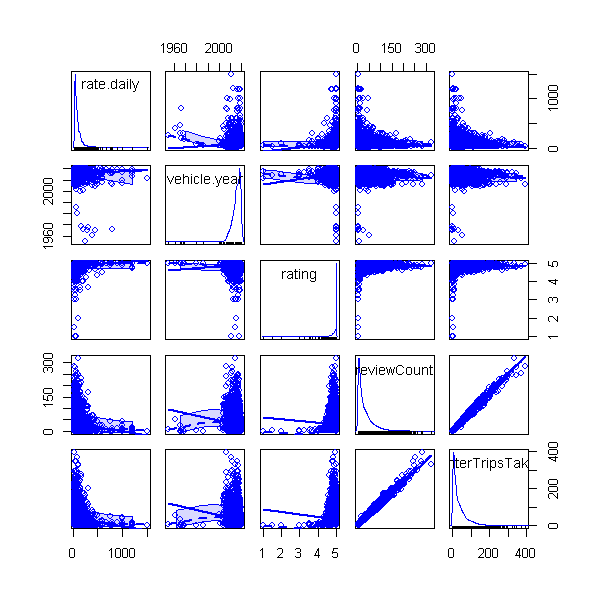

In [120]:
scatterplotMatrix(cR.numeric, regLine=TRUE)

Warning message in par(usr):
"argument 1 does not name a graphical parameter"
Warning message in par(usr):
"argument 1 does not name a graphical parameter"
Warning message in par(usr):
"argument 1 does not name a graphical parameter"
Warning message in par(usr):
"argument 1 does not name a graphical parameter"
Warning message in par(usr):
"argument 1 does not name a graphical parameter"
Warning message in par(usr):
"argument 1 does not name a graphical parameter"
Warning message in par(usr):
"argument 1 does not name a graphical parameter"
Warning message in par(usr):
"argument 1 does not name a graphical parameter"
Warning message in par(usr):
"argument 1 does not name a graphical parameter"
Warning message in par(usr):
"argument 1 does not name a graphical parameter"


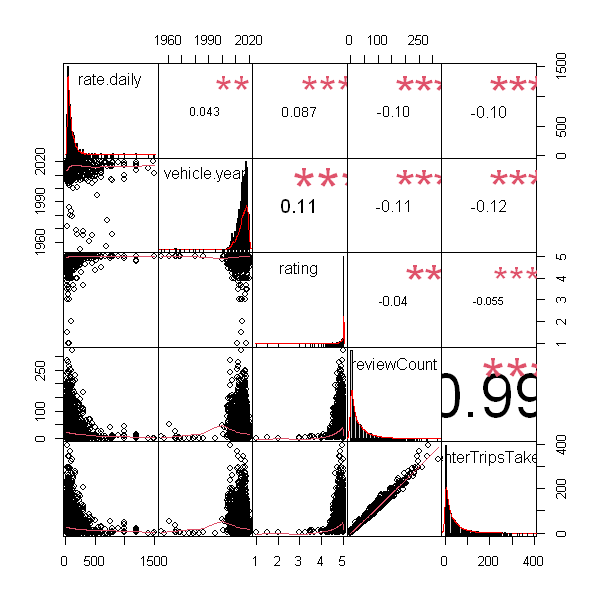

In [121]:
chart.Correlation(cR.numeric, histogram=TRUE, pch=19)

### <span style="color: LightSalmon;"> 2.2 Exploration of Dependent Variable: rate.daily </span>

#### <span style="color: #FFBF00;"> *2.2.1 Overall Assessment of rate.daily* </span>

**Summary of dependent variable**

In [122]:
summary(carRentals$rate.daily)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  20.00   45.00   69.00   93.69  110.00 1500.00 

It appears that our dependent variable suffers from:
* Non-Normality: Mean is almost 50% larger than median
* Severe Outliers: Max rate is 21 IQR's away from 3rd Qu.

**Normality Test**

In [123]:
options(repr.plot.width=4, repr.plot.height=3)

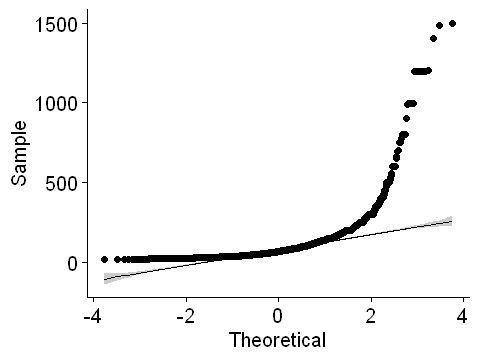

In [124]:
ggqqplot(carRentals$rate.daily)

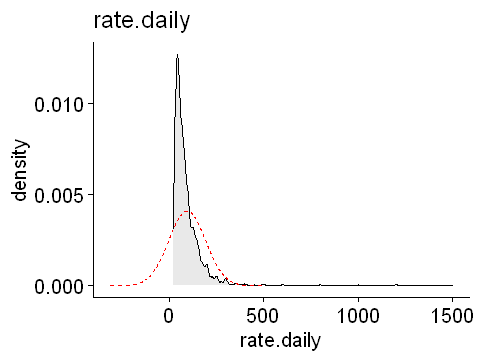

In [125]:
ggdensity(carRentals, x="rate.daily", fill="lightgray", title="rate.daily") +
  stat_overlay_normal_density(color="red", linetype="dashed")

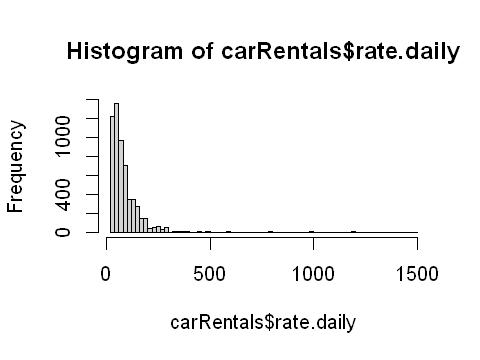

In [126]:
hist(carRentals$rate.daily, breaks=sqrt(nrow(carRentals)))

In [127]:
shapiro.test(sample(carRentals$rate.daily, 500))


	Shapiro-Wilk normality test

data:  sample(carRentals$rate.daily, 500)
W = 0.52699, p-value < 2.2e-16


Attempting to use Logarithm to improve normality

In [128]:
carRentals$log.rate.daily <- log(carRentals$rate.daily)

In [129]:
summary(carRentals$log.rate.daily)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.996   3.807   4.234   4.291   4.700   7.313 

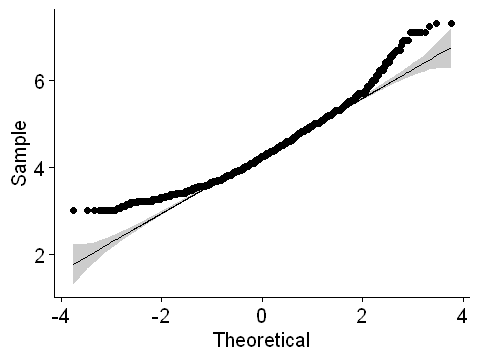

In [130]:
ggqqplot(carRentals$log.rate.daily)

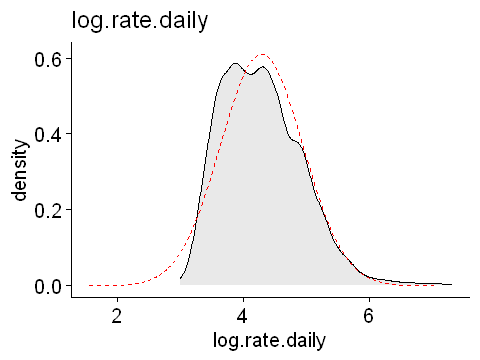

In [131]:
ggdensity(carRentals, x="log.rate.daily", fill="lightgray", title="log.rate.daily") +
  stat_overlay_normal_density(color="red", linetype="dashed")

In [132]:
options(repr.plot.width=8, repr.plot.height=4)

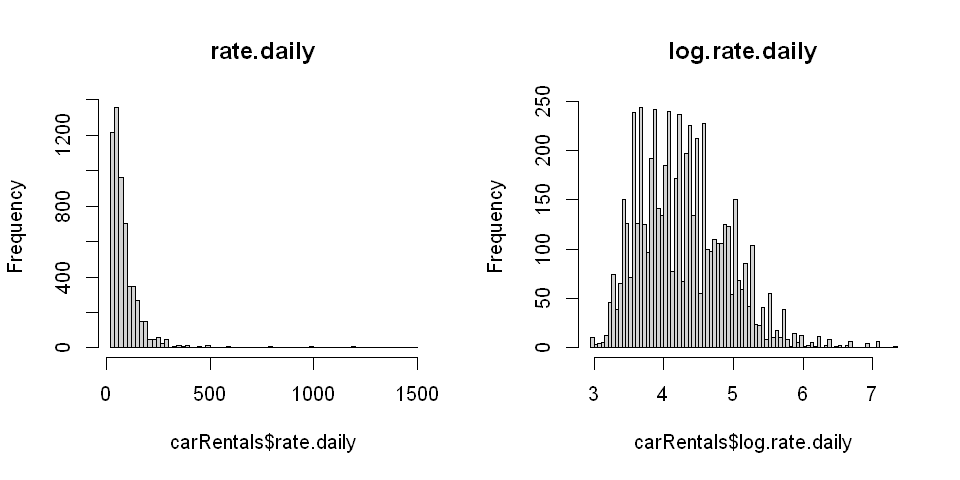

In [133]:
par(mfrow=c(1,2))
hist(carRentals$rate.daily, main="rate.daily", breaks=sqrt(nrow(carRentals)))
hist(carRentals$log.rate.daily, main="log.rate.daily", breaks=sqrt(nrow(carRentals)))

In [134]:
shapiro.test(sample(carRentals$log.rate.daily, 500))


	Shapiro-Wilk normality test

data:  sample(carRentals$log.rate.daily, 500)
W = 0.9793, p-value = 1.545e-06


#### <span style="color: #FFBF00;"> *2.2.2 Handling Outliers of rate.daily* </span>

**Outliers of rate.daily**

In [135]:
cutoff.mult <- 2

In [136]:
uq <- quantile(carRentals$rate.daily, .75)
lq <- quantile(carRentals$rate.daily, .25)
iqr <- uq - lq
outlier.upper.cutoff <- uq + cutoff.mult * iqr

In [137]:
nrow(carRentals[carRentals$rate.daily > outlier.upper.cutoff,])

[1] 251

**Outliers of log.rate.daily**

In [138]:
uq <- quantile(carRentals$log.rate.daily, .75)
lq <- quantile(carRentals$log.rate.daily, .25)
iqr <- uq - lq
outlier.upper.cutoff <- uq + cutoff.mult * iqr

In [139]:
nrow(carRentals[carRentals$log.rate.daily > outlier.upper.cutoff,])

[1] 32

In [140]:
print(summary(carRentals[carRentals$log.rate.daily > outlier.upper.cutoff,]$fuelType))

           DIESEL ELECTRIC GASOLINE   HYBRID 
       5        0        1       25        1 


In [141]:
print(summary(carRentals[carRentals$log.rate.daily > outlier.upper.cutoff,]$vehicle.year))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1957    2012    2017    2011    2019    2020 


Very few rental cars are classical from the last century, *which likely have a different pricing mechanism than the bulk of rental cars*

In [142]:
carRentals[carRentals$vehicle.year < (2012-cutoff.mult*(2019-2012)),]$vehicle.year

[1] 1968 1965 1976 1979 1980 1961 1983 1995 1966 1957 1966 1986 1955 1965 1972
[16] 1969

In [143]:
carRentals[carRentals$vehicle.year < (2012-cutoff.mult*(2019-2012)),]

,fuelType,rating,renterTripsTaken,reviewCount,location.city,location.country,location.latitude,location.longitude,location.state,owner.id,rate.daily,vehicle.make,vehicle.model,vehicle.type,vehicle.year,airportcity,log.rate.daily
,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<fct>,<dbl>
419,GASOLINE,5.00,2,2,Asheville,US,35.48414,-82.55078,NC,10681742,300,Ford,mustang,car,1968,Asheville,5.703782
421,GASOLINE,5.00,1,1,Asheville,US,35.48512,-82.55238,NC,10681742,450,Ford,Shelby AC Cobra,car,1965,Asheville,6.109248
422,,NA,0,0,Asheville,US,35.61451,-82.64856,NC,3422524,700,Rolls Royce,Silver Shadow,car,1976,Asheville,6.551080
889,GASOLINE,NA,0,0,Corpus Christi,US,27.83232,-97.57191,TX,14690366,110,FIAT,124 Convertible 2000,car,1979,Corpus Christi,4.700480
936,GASOLINE,5.00,4,3,Plano,US,33.08074,-96.73956,TX,2135384,79,Porsche,Boxster,car,1980,Dallas,4.369448
1246,GASOLINE,4.98,54,51,Coppell,US,32.96578,-96.97272,TX,2682307,399,Chevrolet,Corvette,car,1961,Dallas-Fort Worth,5.988961
1935,GASOLINE,NA,0,0,Jacksonville,US,30.07253,-81.54989,FL,10041954,98,Mercedes-Benz,380sl,car,1983,Jacksonville,4.584967
3164,GASOLINE,NA,0,0,Los Angeles,US,34.04570,-118.23219,CA,6410040,535,Ferrari,348 Spider,car,1995,Ontario,6.282267
3958,GASOLINE,5.00,11,8,North Kingstown,US,41.61391,-71.45971,RI,1508165,200,Ford,Mustang,car,1966,Providence,5.298317


**Exploring the remaining outliers of log.rate.daily which are not classical cars**

In [144]:
carRentals[carRentals$log.rate.daily > outlier.upper.cutoff & carRentals$vehicle.year > (2012-cutoff.mult*(2019-2012)),]

,fuelType,rating,renterTripsTaken,reviewCount,location.city,location.country,location.latitude,location.longitude,location.state,owner.id,rate.daily,vehicle.make,vehicle.model,vehicle.type,vehicle.year,airportcity,log.rate.daily
,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<fct>,<dbl>
223,ELECTRIC,5.00,4,2,McDonough,US,33.50418,-84.16902,GA,7934891,800,Tesla,Model X,suv,2019,Atlanta,6.684612
432,GASOLINE,5.00,9,8,Cromwell,US,41.62007,-72.68921,CT,1581963,999,Lamborghini,Gallardo,car,2007,Hartford,6.906755
468,HYBRID,NA,0,0,Oxford,US,33.61092,-85.79394,AL,4996747,695,BMW,I8,car,2019,Birmingham,6.543912
536,GASOLINE,5.00,1,1,Nashville,US,36.10909,-86.70879,TN,15483437,750,Porsche,Cayman,car,2016,Nashville,6.620073
878,GASOLINE,NA,0,0,Monument,US,39.06514,-104.83397,CO,15248243,1485,Ford,Mustang,car,2020,Colorado Springs,7.303170
1020,GASOLINE,NA,0,0,Tyson’s,US,38.91814,-77.21953,VA,2457793,750,Mercedes-Benz,C-Class,car,2017,Washington,6.620073
1395,GASOLINE,5.00,4,3,East Brunswick,US,40.42959,-74.39189,NJ,2561238,799,McLaren,570S,car,2016,Newark,6.683361
1412,GASOLINE,5.00,8,6,Fair Lawn,US,40.92809,-74.11592,NJ,1319433,799,Audi,R8,car,2017,Newark,6.683361
1570,,4.80,21,15,Miami Beach,US,25.79181,-80.12856,FL,9541863,1199,Lamborghini,Huracan,car,2019,Fort Lauderdale,7.089243


In [145]:
unique(carRentals[carRentals$log.rate.daily > outlier.upper.cutoff & carRentals$vehicle.year > (2012-cutoff.mult*(2019-2012)),]$vehicle.make)

[1] Tesla         Lamborghini   BMW           Porsche       Ford         
 [6] Mercedes-Benz McLaren       Audi          Ferrari       Rolls Royce  
[11] Aston Martin  Chevrolet    
54 Levels: Acura Alfa-romeo Alfa Romeo Aston Martin Audi Bentley BMW ... Volvo

It appears that most current rental cars with outlier log.rate.daily are legitimate data points of fancier car models

### <span style="color: LightSalmon;"> 2.3 Relations to Numerical Features </span>

#### <span style="color: #FFBF00;"> *2.3.1 Relationship of rate.day ~ vehicle.year* </span>

In [146]:
lm.fit <- lm(log.rate.daily ~ vehicle.year, data=carRentals)
summary(lm.fit)


Call:
lm(formula = log.rate.daily ~ vehicle.year, data = carRentals)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.3416 -0.4876 -0.0668  0.3860  3.8815 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -51.965570   4.145199  -12.54   <2e-16 ***
vehicle.year   0.027914   0.002057   13.57   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6373 on 5849 degrees of freedom
Multiple R-squared:  0.03053,	Adjusted R-squared:  0.03036 
F-statistic: 184.2 on 1 and 5849 DF,  p-value: < 2.2e-16


In [147]:
mse.usd(lm.fit)

[1] 4.510414

In [148]:
options(repr.plot.width=7, repr.plot.height=5)

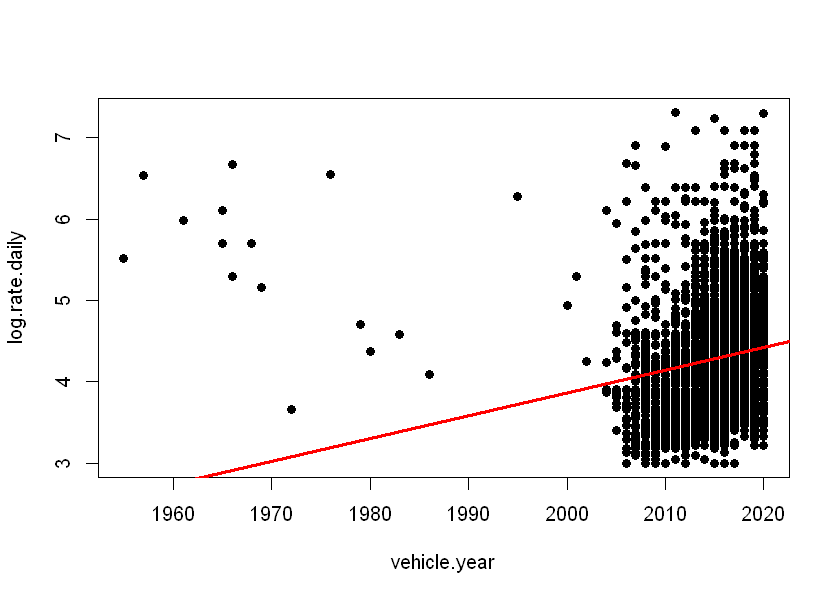

In [149]:
plot(log.rate.daily ~ vehicle.year, pch=19, data=carRentals)
abline(lm.fit, col="red", lwd=3)

**Dropping classical cars outliers**

In [150]:
cutoff.mult <- 3
uq <- quantile(carRentals$vehicle.year, .75)
lq <- quantile(carRentals$vehicle.year, .25)
iqr <- uq - lq
outlier.lower.cutoff <- lq - cutoff.mult * iqr

In [151]:
outlier.lower.cutoff

25% 
2002

In [152]:
classical.rows <- as.numeric(rownames(carRentals[carRentals$vehicle.year < outlier.lower.cutoff,]))

In [153]:
carRentals[classical.rows,]

,fuelType,rating,renterTripsTaken,reviewCount,location.city,location.country,location.latitude,location.longitude,location.state,owner.id,rate.daily,vehicle.make,vehicle.model,vehicle.type,vehicle.year,airportcity,log.rate.daily
,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<fct>,<dbl>
419,GASOLINE,5.00,2,2,Asheville,US,35.48414,-82.55078,NC,10681742,300,Ford,mustang,car,1968,Asheville,5.703782
421,GASOLINE,5.00,1,1,Asheville,US,35.48512,-82.55238,NC,10681742,450,Ford,Shelby AC Cobra,car,1965,Asheville,6.109248
422,,NA,0,0,Asheville,US,35.61451,-82.64856,NC,3422524,700,Rolls Royce,Silver Shadow,car,1976,Asheville,6.551080
889,GASOLINE,NA,0,0,Corpus Christi,US,27.83232,-97.57191,TX,14690366,110,FIAT,124 Convertible 2000,car,1979,Corpus Christi,4.700480
936,GASOLINE,5.00,4,3,Plano,US,33.08074,-96.73956,TX,2135384,79,Porsche,Boxster,car,1980,Dallas,4.369448
1246,GASOLINE,4.98,54,51,Coppell,US,32.96578,-96.97272,TX,2682307,399,Chevrolet,Corvette,car,1961,Dallas-Fort Worth,5.988961
1935,GASOLINE,NA,0,0,Jacksonville,US,30.07253,-81.54989,FL,10041954,98,Mercedes-Benz,380sl,car,1983,Jacksonville,4.584967
3009,GASOLINE,4.87,62,46,Palo Alto,US,37.42579,-122.14140,CA,270754,139,Porsche,911,car,2000,Oakland,4.934474
3164,GASOLINE,NA,0,0,Los Angeles,US,34.04570,-118.23219,CA,6410040,535,Ferrari,348 Spider,car,1995,Ontario,6.282267


In [154]:
carRentals.noClassical <- carRentals[-classical.rows,]
lm.fit <- lm(log.rate.daily ~ vehicle.year, data=carRentals.noClassical)
summary(lm.fit)


Call:
lm(formula = log.rate.daily ~ vehicle.year, data = carRentals.noClassical)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.3789 -0.4626 -0.0619  0.3735  3.2791 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.101e+02  4.953e+00  -22.23   <2e-16 ***
vehicle.year  5.675e-02  2.457e-03   23.09   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6159 on 5831 degrees of freedom
Multiple R-squared:  0.0838,	Adjusted R-squared:  0.08364 
F-statistic: 533.3 on 1 and 5831 DF,  p-value: < 2.2e-16


In [155]:
mse.usd(lm.fit)

[1] 3.363076

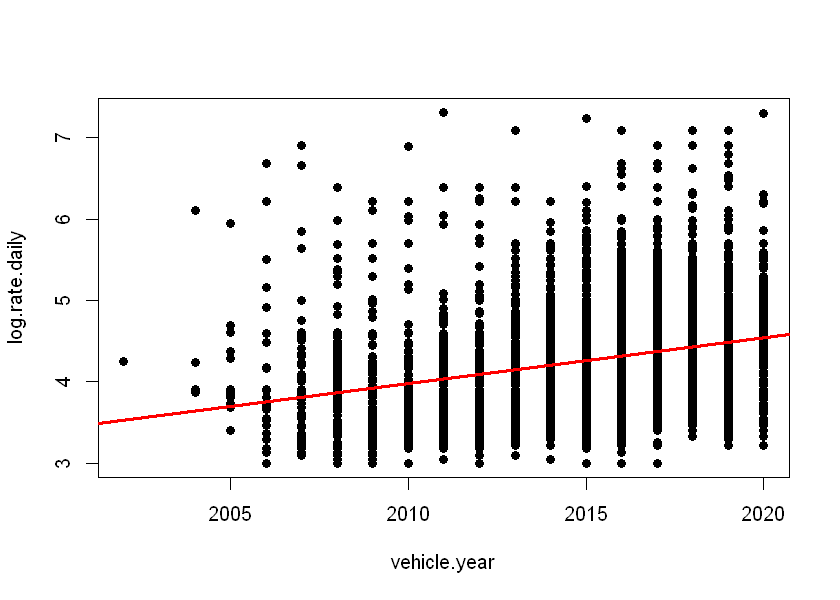

In [156]:
plot(log.rate.daily ~ vehicle.year, pch=19, data=carRentals.noClassical)
abline(lm.fit, col="red", lwd=3)

Classical car rentals likely have a different market than regular rental cars. Also, their sample size is small in this dataset. <br>
By dropping the classical car outliers, the adjusted R<sup>2</sup> increased (0.08 vs 0.03) and the estimates for the intercept and year have changed significantly

#### <span style="color: #FFBF00;"> *2.3.2 Relationship of log.rate.daily ~ rating and review count* </span>

In [157]:
sum(is.na(carRentals.noClassical$rating))

[1] 495

In [158]:
carRentals.noClassical[is.na(carRentals.noClassical$rating) & carRentals.noClassical$renterTripsTaken != 0,]

,fuelType,rating,renterTripsTaken,reviewCount,location.city,location.country,location.latitude,location.longitude,location.state,owner.id,rate.daily,vehicle.make,vehicle.model,vehicle.type,vehicle.year,airportcity,log.rate.daily
,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<fct>,<dbl>
123,GASOLINE,NA,1,0,Atlanta,US,33.77651,-84.40841,GA,15071013,105,GMC,Yukon,suv,2019,Atlanta,4.653960
244,GASOLINE,NA,3,0,Austin,US,30.28482,-97.70575,TX,14404790,35,FIAT,500,car,2012,Austin,3.555348
405,GASOLINE,NA,1,0,Austin,US,30.34969,-97.73438,TX,2064076,28,Toyota,RAV4,suv,2011,Austin,3.332205
412,ELECTRIC,NA,1,0,Barnardsville,US,35.75672,-82.42724,NC,14788580,229,Tesla,Model S,car,2014,Asheville,5.433722
453,HYBRID,NA,1,0,Edmonds,US,47.78609,-122.34361,WA,3965077,80,Toyota,Prius,car,2015,Seattle,4.382027
700,GASOLINE,NA,1,0,Medina,US,41.10783,-81.82268,OH,9189775,100,Cadillac,XTS,car,2014,Cleveland,4.605170
734,GASOLINE,NA,3,0,Charlotte,US,35.02750,-80.85154,NC,3037725,299,Cadillac,Escalade,suv,2017,Charlotte,5.700444
737,GASOLINE,NA,1,0,Charlotte,US,35.02941,-80.80522,NC,4451172,249,Jaguar,F-TYPE,car,2018,Charlotte,5.517453
988,GASOLINE,NA,2,0,Fairfax,US,38.81717,-77.27713,VA,7641399,34,Nissan,Altima,car,2016,Washington,3.526361


All rating entries with NA are for cars which have 0 reviews, so this is a logical non-existance of data rather than a missing values problem

In [159]:
lm.fit <- lm(log.rate.daily ~ reviewCount, data=carRentals.noClassical)
summary(lm.fit)


Call:
lm(formula = log.rate.daily ~ reviewCount, data = carRentals.noClassical)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.34259 -0.48862 -0.06877  0.41810  2.97298 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.3421568  0.0107887 402.474  < 2e-16 ***
reviewCount -0.0019151  0.0002383  -8.036 1.12e-15 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.64 on 5831 degrees of freedom
Multiple R-squared:  0.01095,	Adjusted R-squared:  0.01078 
F-statistic: 64.57 on 1 and 5831 DF,  p-value: 1.116e-15


In [160]:
mse.usd(lm.fit)

[1] 3.209115

In [161]:
lm.fit <- lm(log.rate.daily ~ rating + reviewCount, data=carRentals.noClassical)
summary(lm.fit)


Call:
lm(formula = log.rate.daily ~ rating + reviewCount, data = carRentals.noClassical)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.35444 -0.47099 -0.06484  0.40794  2.96153 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.1085423  0.2315681   9.105  < 2e-16 ***
rating       0.4489342  0.0469478   9.562  < 2e-16 ***
reviewCount -0.0015187  0.0002407  -6.310 3.01e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6258 on 5335 degrees of freedom
  (495 observations deleted due to missingness)
Multiple R-squared:  0.0249,	Adjusted R-squared:  0.02454 
F-statistic: 68.13 on 2 and 5335 DF,  p-value: < 2.2e-16


In [162]:
mse.usd(lm.fit)

[1] 3.033458

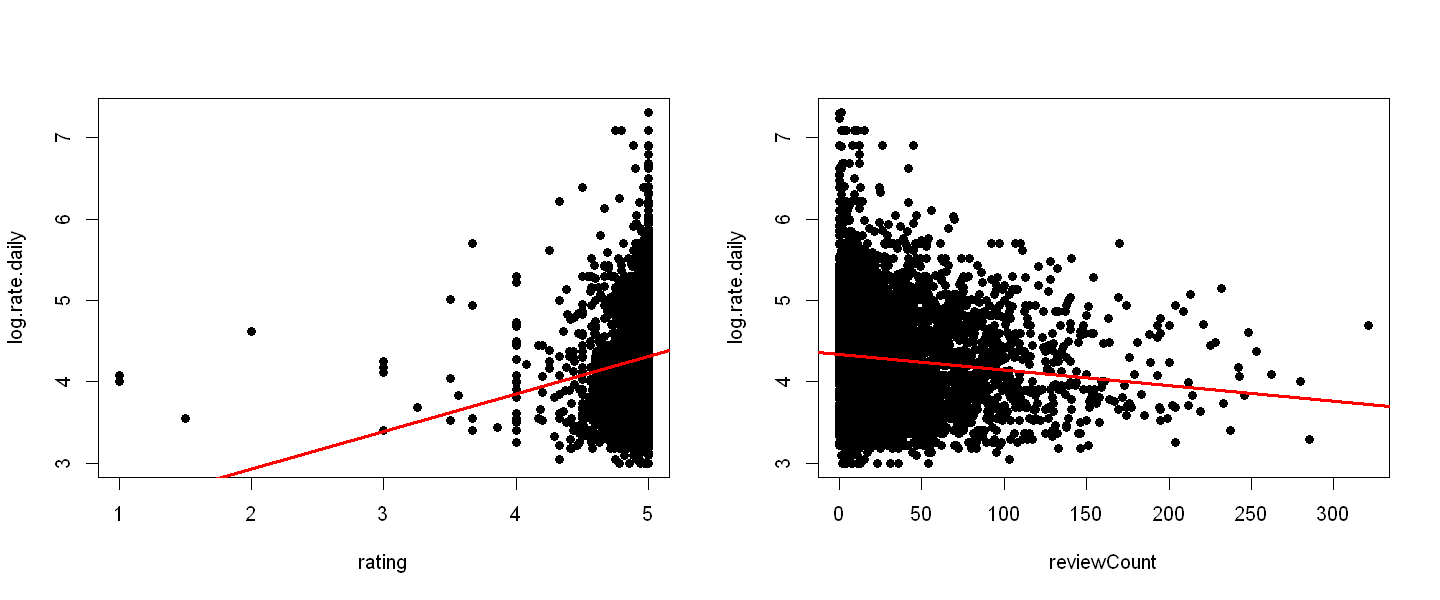

In [163]:
options(repr.plot.width=12, repr.plot.height=5)
par(mfrow=c(1,2))

plot(log.rate.daily ~ rating, pch=19, data=carRentals.noClassical)
abline(lm(log.rate.daily ~ rating, data=carRentals.noClassical), col="red", lwd=3)

plot(log.rate.daily ~ reviewCount, pch=19, data=carRentals.noClassical)
abline(lm(log.rate.daily ~ reviewCount, data=carRentals.noClassical), col="red", lwd=3)

In [164]:
lm.fit <- lm(log.rate.daily ~ poly(reviewCount,8), data=carRentals.noClassical)
summary(lm.fit)


Call:
lm(formula = log.rate.daily ~ poly(reviewCount, 8), data = carRentals.noClassical)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.41412 -0.48833 -0.06418  0.40928  2.88233 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)            4.287548   0.008344 513.828  < 2e-16 ***
poly(reviewCount, 8)1 -5.142679   0.637290  -8.070 8.50e-16 ***
poly(reviewCount, 8)2  3.048197   0.637290   4.783 1.77e-06 ***
poly(reviewCount, 8)3 -2.065680   0.637290  -3.241  0.00120 ** 
poly(reviewCount, 8)4  1.976826   0.637290   3.102  0.00193 ** 
poly(reviewCount, 8)5 -1.390977   0.637290  -2.183  0.02910 *  
poly(reviewCount, 8)6  1.625513   0.637290   2.551  0.01078 *  
poly(reviewCount, 8)7 -0.109233   0.637290  -0.171  0.86391    
poly(reviewCount, 8)8  0.854081   0.637290   1.340  0.18024    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6373 on 5824 degrees of freedom
Multiple R-squared:  0.0

In [165]:
lm.fit <- lm(log.rate.daily ~ poly(reviewCount,2), data=carRentals.noClassical)
summary(lm.fit)


Call:
lm(formula = log.rate.daily ~ poly(reviewCount, 2), data = carRentals.noClassical)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.36858 -0.48307 -0.06378  0.42179  2.94485 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)            4.287548   0.008364 512.633  < 2e-16 ***
poly(reviewCount, 2)1 -5.142679   0.638776  -8.051 9.89e-16 ***
poly(reviewCount, 2)2  3.048197   0.638776   4.772 1.87e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6388 on 5830 degrees of freedom
Multiple R-squared:  0.0148,	Adjusted R-squared:  0.01446 
F-statistic: 43.79 on 2 and 5830 DF,  p-value: < 2.2e-16


**Explore the negative trend between reviewCount and log.rate.daily (*middle graph*)**

In [166]:
lm.fit <- lm(reviewCount ~ vehicle.year + rating, data=carRentals.noClassical)
summary(lm.fit)


Call:
lm(formula = reviewCount ~ vehicle.year + rating, data = carRentals.noClassical)

Residuals:
   Min     1Q Median     3Q    Max 
-51.55 -23.09 -11.70  11.30 287.91 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3269.407    294.779  11.091   <2e-16 ***
vehicle.year   -1.598      0.147 -10.867   <2e-16 ***
rating         -3.666      2.666  -1.375    0.169    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 35.21 on 5335 degrees of freedom
  (495 observations deleted due to missingness)
Multiple R-squared:  0.02319,	Adjusted R-squared:  0.02282 
F-statistic: 63.33 on 2 and 5335 DF,  p-value: < 2.2e-16


In [167]:
mse.usd(lm.fit)

[1] 2.225987e+246

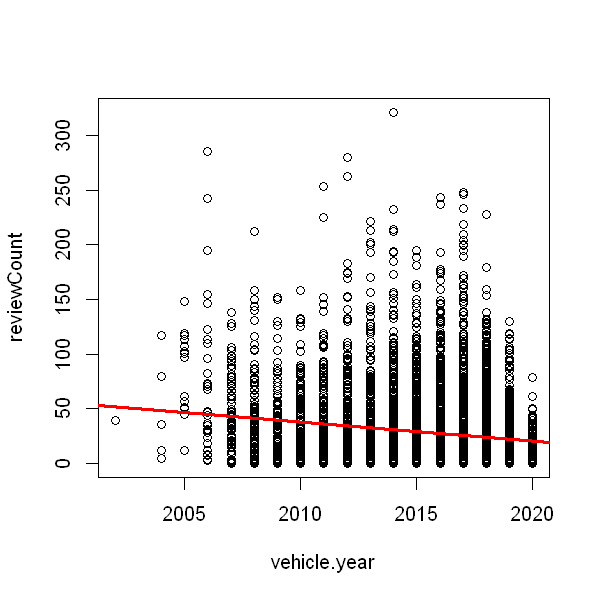

In [168]:
options(repr.plot.width=5, repr.plot.height=5)
plot(reviewCount ~ vehicle.year, pch=1, data=carRentals.noClassical)
abline(lm(reviewCount ~ vehicle.year, data=carRentals.noClassical), col="red", lwd=3)

Counterintuitively, the more reviews the lower the rate. <br> Part of this could be attributed to older cars accumulating more reviews (*negative correlation of reviewCounts with vehicle.year)*

#### <span style="color: #FFBF00;"> *2.3.2 Relationship of log.rate.daily ~ renterTripsTaken* </span>

In [169]:
summary(carRentals.noClassical$renterTripsTaken)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    5.00   18.00   33.55   46.00  395.00 

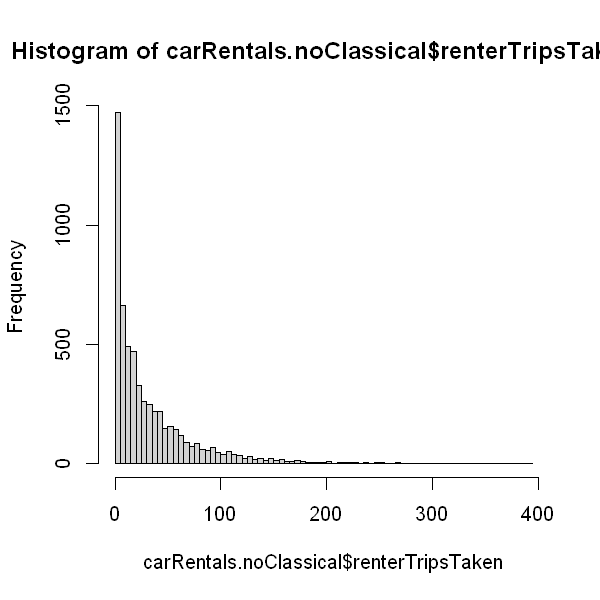

In [170]:
hist(carRentals.noClassical$renterTripsTaken, breaks=sqrt(nrow(carRentals.noClassical)))

In [171]:
zero.renterTripsTaken <- carRentals.noClassical[carRentals.noClassical$renterTripsTaken == 0,]

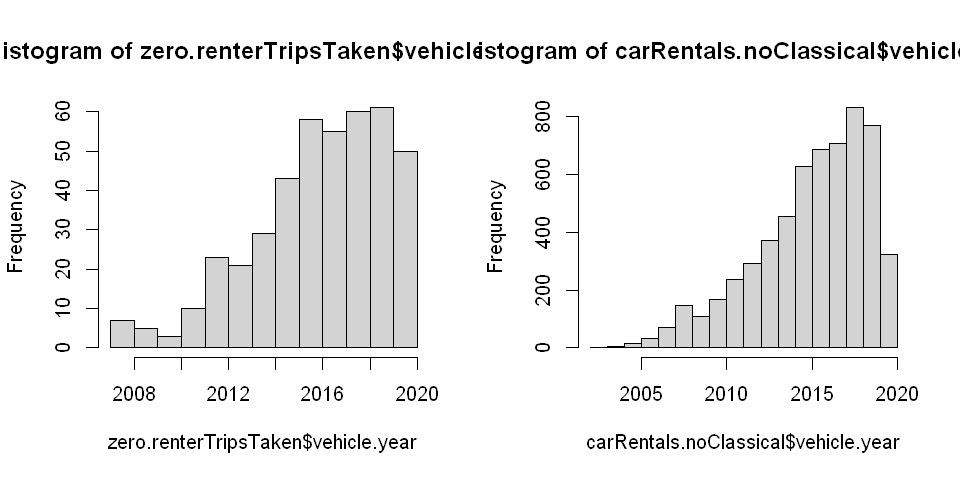

In [172]:
options(repr.plot.width=8, repr.plot.height=4)
par(mfrow=c(1,2))
hist(zero.renterTripsTaken$vehicle.year, breaks= (max(zero.renterTripsTaken$vehicle.year)-min(zero.renterTripsTaken$vehicle.year)+1))
hist(carRentals.noClassical$vehicle.year, breaks= (max(carRentals.noClassical$vehicle.year)-min(carRentals.noClassical$vehicle.year)+1))

**Check ratio of zero trips per stock of cars for each year**

In [173]:
count.rows.perYear <- as.data.frame(table(zero.renterTripsTaken$vehicle.year))
zero.renterTripsTaken.perYear <- as.data.frame(table(carRentals.noClassical$vehicle.year))
df12 <- left_join(zero.renterTripsTaken.perYear, count.rows.perYear, by = 'Var1')
df12$ratio.zeroTrips.perYear <- df12$Freq.y / df12$Freq.x
df12 <- df12[-c(1:4),]

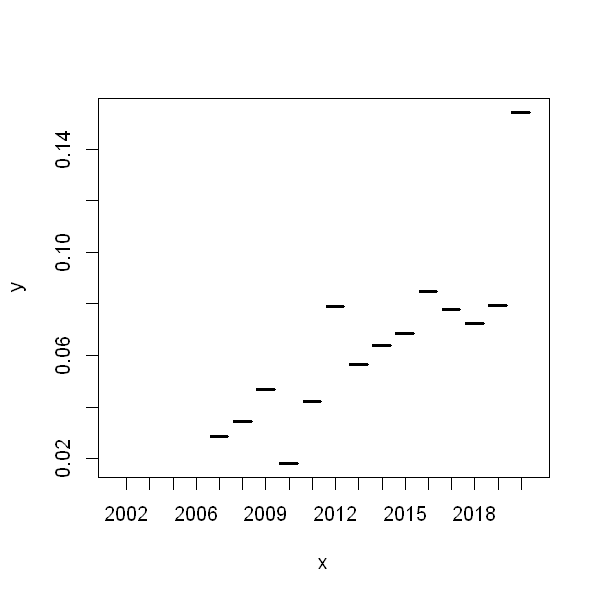

In [174]:
options(repr.plot.width=5, repr.plot.height=5)
plot(x=df12$Var1, y=df12$ratio.zeroTrips.perYear, data=df12)

In [175]:
count.renterTripsTaken <- carRentals.noClassical %>% count(renterTripsTaken)

In [176]:
summary(count.renterTripsTaken)

 renterTripsTaken       n         
 Min.   :  0.00   Min.   :  1.00  
 1st Qu.: 59.25   1st Qu.:  2.00  
 Median :118.50   Median :  6.50  
 Mean   :127.40   Mean   : 24.51  
 3rd Qu.:182.75   3rd Qu.: 26.25  
 Max.   :395.00   Max.   :425.00  

**Distribution of "Count" of renterTripsTaken**

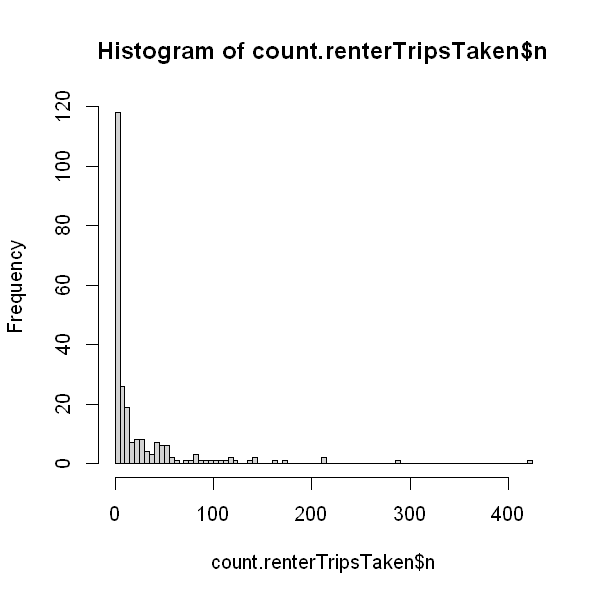

In [177]:
hist(count.renterTripsTaken$n, breaks=80)

In [178]:
carRentals.noClassical[carRentals.noClassical$renterTripsTaken == 0,]

,fuelType,rating,renterTripsTaken,reviewCount,location.city,location.country,location.latitude,location.longitude,location.state,owner.id,rate.daily,vehicle.make,vehicle.model,vehicle.type,vehicle.year,airportcity,log.rate.daily
,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<fct>,<dbl>
17,GASOLINE,NA,0,0,Albuquerque,US,35.11565,-106.57881,NM,1889102,42,Jeep,Cherokee,suv,2018,Albuquerque,3.737670
30,GASOLINE,NA,0,0,Grovetown,US,33.50852,-82.23632,GA,14680097,125,GMC,Yukon XL,suv,2018,Augusta,4.828314
45,GASOLINE,NA,0,0,Tampa,US,28.08295,-82.54215,FL,14752326,96,BMW,4 Series,car,2018,Atlanta,4.564348
88,GASOLINE,NA,0,0,Atlanta,US,33.64092,-84.44414,GA,10696094,70,Mercedes-Benz,GLA-Class,suv,2015,Atlanta,4.248495
107,ELECTRIC,NA,0,0,Atlanta,US,33.78983,-84.38813,GA,1523445,138,Tesla,Model 3,car,2020,Atlanta,4.927254
113,GASOLINE,NA,0,0,Marietta,US,33.91812,-84.55454,GA,735348,135,Porsche,718 Cayman,car,2017,Atlanta,4.905275
122,GASOLINE,NA,0,0,Fairburn,US,33.62194,-84.65349,GA,1278682,82,Mercedes-Benz,C-Class,car,2016,Atlanta,4.406719
145,GASOLINE,NA,0,0,Douglasville,US,33.63681,-84.82751,GA,2530195,135,Acura,MDX,suv,2016,Atlanta,4.905275
152,,NA,0,0,Atlanta,US,33.59502,-84.42269,GA,14917535,28,Kia,Rio,car,2020,Atlanta,3.332205


**Regression on renterTripsTaken (as-is)**

In [179]:
lm.fit <- lm(log.rate.daily ~ renterTripsTaken, data=carRentals.noClassical)
summary(lm.fit)


Call:
lm(formula = log.rate.daily ~ renterTripsTaken, data = carRentals.noClassical)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.34731 -0.48752 -0.06813  0.41603  2.96842 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       4.3465566  0.0107196 405.476   <2e-16 ***
renterTripsTaken -0.0017590  0.0001996  -8.811   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6393 on 5831 degrees of freedom
Multiple R-squared:  0.01314,	Adjusted R-squared:  0.01297 
F-statistic: 77.63 on 1 and 5831 DF,  p-value: < 2.2e-16


In [180]:
mse.usd(lm.fit)

[1] 3.202942

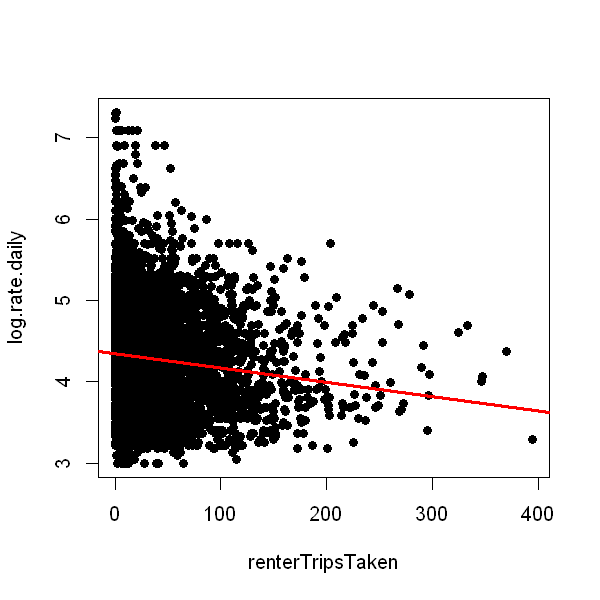

In [181]:
plot(log.rate.daily ~ renterTripsTaken, pch=19, data=carRentals.noClassical)
abline(lm.fit, col="red", lwd=3)

**Regression on renterTripsTaken (dropped rows with 0 trips prior to 2020)**

In [182]:
cutoffYear.zeroTrips <- 2020
lm.fit <- lm(log.rate.daily ~ renterTripsTaken, data=carRentals.noClassical[(carRentals.noClassical$renterTripsTaken != 0 & carRentals.noClassical$vehicle.year < cutoffYear.zeroTrips) | carRentals.noClassical$vehicle.year >= cutoffYear.zeroTrips,])
summary(lm.fit)


Call:
lm(formula = log.rate.daily ~ renterTripsTaken, data = carRentals.noClassical[(carRentals.noClassical$renterTripsTaken != 
    0 & carRentals.noClassical$vehicle.year < cutoffYear.zeroTrips) | 
    carRentals.noClassical$vehicle.year >= cutoffYear.zeroTrips, 
    ])

Residuals:
     Min       1Q   Median       3Q      Max 
-1.33570 -0.48588 -0.06673  0.41509  2.98016 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       4.3346769  0.0112622 384.886  < 2e-16 ***
renterTripsTaken -0.0016207  0.0002029  -7.989 1.65e-15 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6352 on 5456 degrees of freedom
Multiple R-squared:  0.01156,	Adjusted R-squared:  0.01138 
F-statistic: 63.82 on 1 and 5456 DF,  p-value: 1.652e-15


No rows are dropped based on number of taken trips

In [183]:
mse.usd(lm.fit)

[1] 3.151517

### <span style="color: LightSalmon;"> 2.4 Relations to Categorical Features </span>

#### <span style="color: #FFBF00;"> *2.4.1 Relationship of log.rate.daily ~ vehicle.make* </span>

##### <span style="color: Teal;"> *2.4.1.1 Problems with vehicle.make data* </span>

**Concilliation of Multi-spelled brands**

Brand variable requires consolidation if it is to be used properly.

In [184]:
carRentals.noClassical %>% count(vehicle.make)

vehicle.make,n
<fct>,<int>
Acura,50
Alfa-romeo,9
Alfa Romeo,21
Aston Martin,5
Audi,169
Bentley,9
BMW,456
Buick,19
Cadillac,44


##### <span style="color: Teal;"> *2.4.1.2 Reconciliation of multi-spelled car makes with the most commonly spelled version* </span>

In [185]:
makes.to.change <- c("Alfa-romeo", "INFINITI", "Mercedes-benz")
makes.references <- c("Alfa Romeo", "Infiniti", "Mercedes-Benz")

In [186]:
for(i in 1:length(makes.to.change)) {
  makes.to.change.rows <- carRentals.noClassical[carRentals.noClassical$vehicle.make == makes.to.change[i],]
  for(j in 1:nrow(makes.to.change.rows)) {
    row.temp <- makes.to.change.rows[j,]
    carRentals.noClassical[row.names(row.temp), "vehicle.make"] <- makes.references[i]
  }
}

Confirm successful reconciliation of makes

In [187]:
carRentals.noClassical %>% count(vehicle.make)

vehicle.make,n
<fct>,<int>
Acura,50
Alfa Romeo,30
Aston Martin,5
Audi,169
Bentley,9
BMW,456
Buick,19
Cadillac,44
Chevrolet,430


Reset factors

In [188]:
carRentals.noClassical$vehicle.make <- droplevels(carRentals.noClassical$vehicle.make)

In [189]:
table(carRentals.noClassical$vehicle.make)


        Acura    Alfa Romeo  Aston Martin          Audi       Bentley 
           50            30             5           169             9 
          BMW         Buick      Cadillac     Chevrolet      Chrysler 
          456            19            44           430            57 
        Dodge       Ferrari          FIAT          Ford       Genesis 
          182            12            41           430             2 
          GMC         Honda        HUMMER       Hyundai      Infiniti 
           66           257             3           183            46 
       Jaguar          Jeep           Kia   Lamborghini    Land Rover 
           57           279           154            15            93 
        Lexus       Lincoln         Lotus      Maserati         Mazda 
          121            21             4            67            71 
      McLaren Mercedes-Benz       Mercury          MINI    Mitsubishi 
            1           390             2            31            29 
     

Warning message in qt((1 + p)/2, ns - 1):
"NaNs produced"
Warning message in arrows(x, li, x, pmax(y - gap, li), col = barcol, lwd = lwd, :
"zero-length arrow is of indeterminate angle and so skipped"
Warning message in arrows(x, li, x, pmax(y - gap, li), col = barcol, lwd = lwd, :
"zero-length arrow is of indeterminate angle and so skipped"
Warning message in arrows(x, li, x, pmax(y - gap, li), col = barcol, lwd = lwd, :
"zero-length arrow is of indeterminate angle and so skipped"
Warning message in arrows(x, li, x, pmax(y - gap, li), col = barcol, lwd = lwd, :
"zero-length arrow is of indeterminate angle and so skipped"
Warning message in arrows(x, li, x, pmax(y - gap, li), col = barcol, lwd = lwd, :
"zero-length arrow is of indeterminate angle and so skipped"
Warning message in arrows(x, li, x, pmax(y - gap, li), col = barcol, lwd = lwd, :
"zero-length arrow is of indeterminate angle and so skipped"
Warning message in arrows(x, li, x, pmax(y - gap, li), col = barcol, lwd = lwd, :
"z

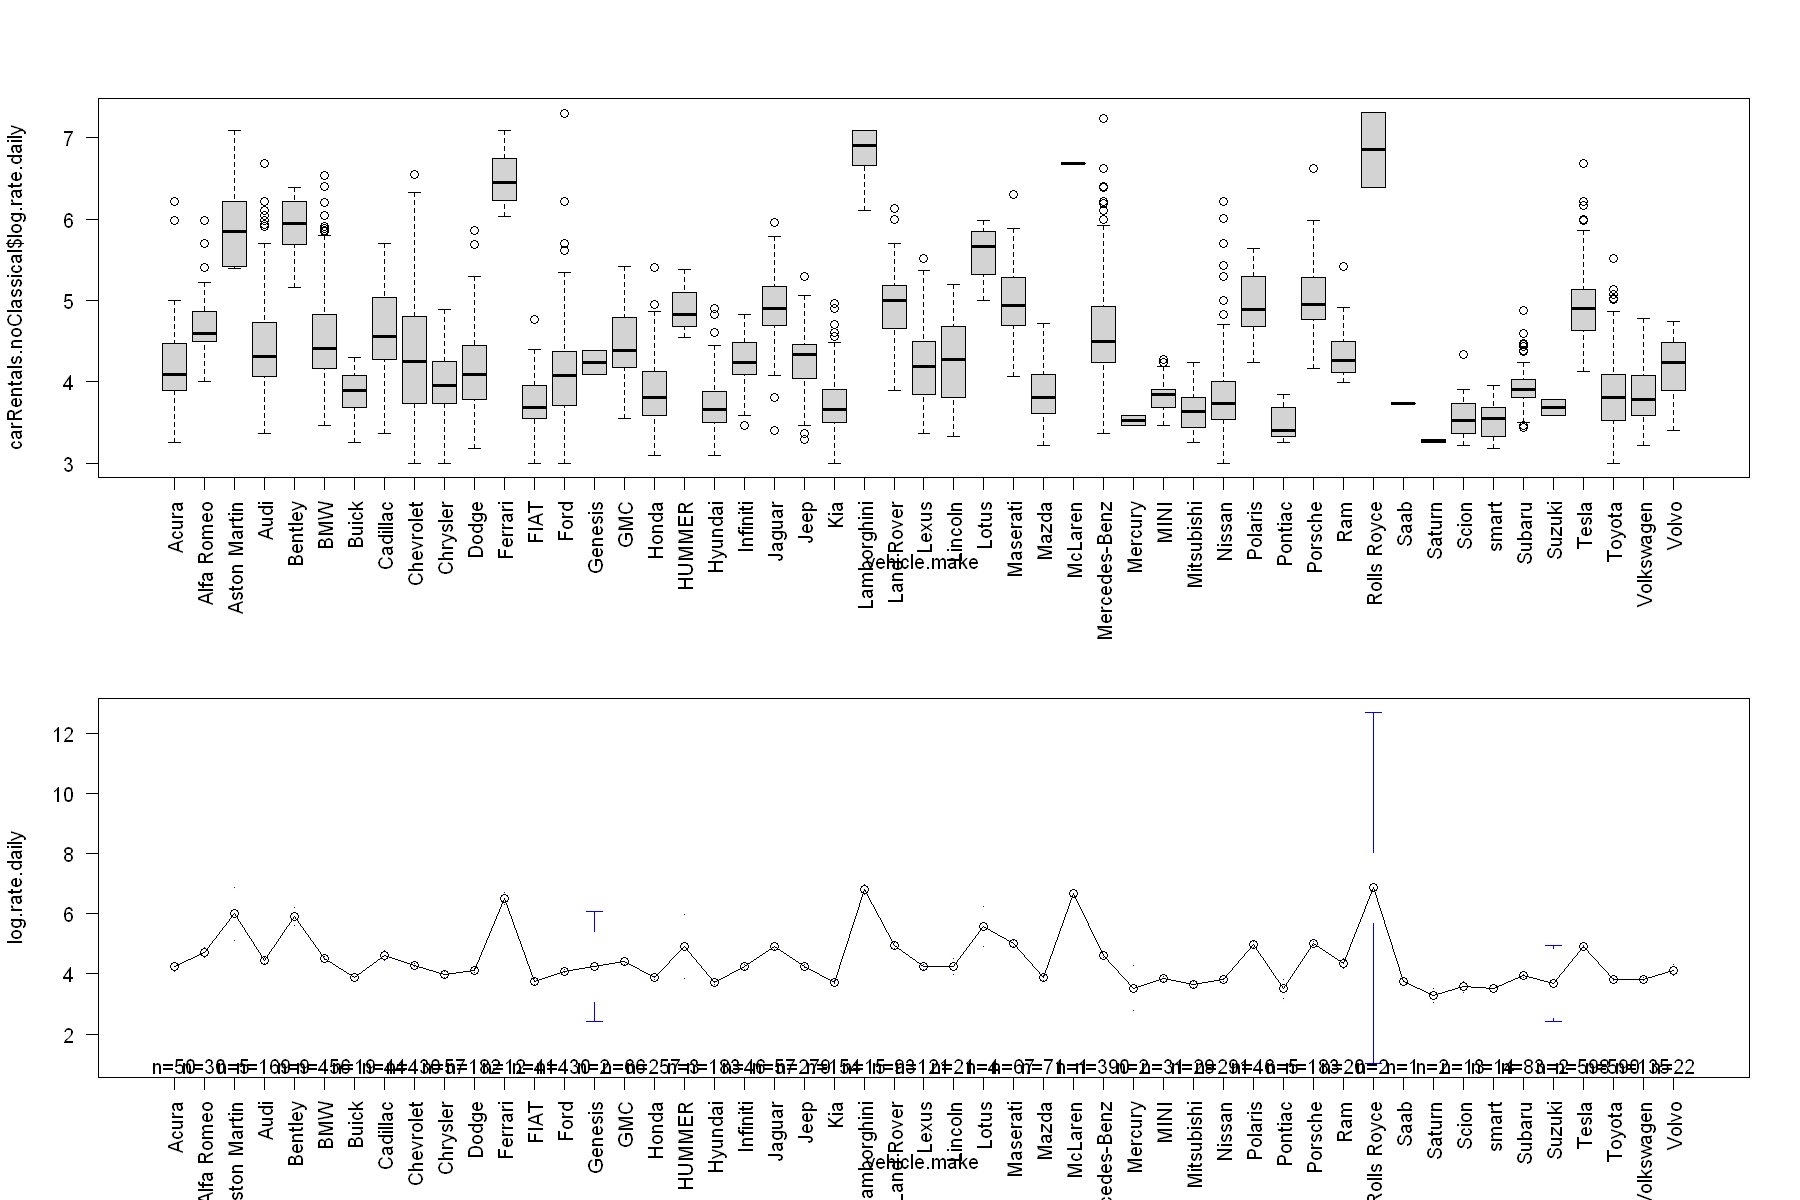

In [190]:
options(repr.plot.width=15, repr.plot.height=10)
par(mfrow=c(2,1))
boxplot(carRentals.noClassical$log.rate.daily ~ vehicle.make, data=carRentals.noClassical, las=2)
plotmeans(log.rate.daily ~ vehicle.make, data=carRentals.noClassical, las=2)

##### <span style="color: Teal;"> *2.4.1.3 Regression of log.rate.daily ~ vehicle.make* </span>

In [191]:
lm.fit <- lm(log.rate.daily ~ vehicle.make, data=carRentals.noClassical)
summary(lm.fit)


Call:
lm(formula = log.rate.daily ~ vehicle.make, data = carRentals.noClassical)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.5196 -0.3012 -0.0363  0.2527  3.2137 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)                4.231910   0.063959  66.166  < 2e-16 ***
vehicle.makeAlfa Romeo     0.488316   0.104444   4.675 3.00e-06 ***
vehicle.makeAston Martin   1.760675   0.212128   8.300  < 2e-16 ***
vehicle.makeAudi           0.209034   0.072808   2.871 0.004106 ** 
vehicle.makeBentley        1.662990   0.163759  10.155  < 2e-16 ***
vehicle.makeBMW            0.287123   0.067374   4.262 2.06e-05 ***
vehicle.makeBuick         -0.356170   0.121884  -2.922 0.003489 ** 
vehicle.makeCadillac       0.380886   0.093484   4.074 4.68e-05 ***
vehicle.makeChevrolet      0.060261   0.067575   0.892 0.372560    
vehicle.makeChrysler      -0.261948   0.087630  -2.989 0.002809 ** 
vehicle.makeDodge         -0.107087   0.072212  -1.483 0.1381

In [192]:
mse.usd(lm.fit)

[1] 1.850992

In [193]:
summary(aov(log.rate.daily ~ vehicle.make, data=carRentals.noClassical))

               Df Sum Sq Mean Sq F value Pr(>F)    
vehicle.make   50   1232  24.639   120.5 <2e-16 ***
Residuals    5782   1183   0.205                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

vehicle.make is a significantly explanative feature

#### <span style="color: #FFBF00;"> *2.4.2 Relationship of log.rate.daily ~ vehicle.model* </span>

##### <span style="color: Teal;"> *2.4.2.1 Problems with vehicle.model data* </span>

**Concilliation of Multi-spelled models**

Model variable requires consolidation if it is to be used properly.

In [194]:
print(carRentals.noClassical %>% count(vehicle.model))

              vehicle.model   n
1                  1 Series   6
2                124 Spider   8
3                      1500  11
4                         2   3
5                  2-Series   1
6                  2 Series  17
7                       200  12
8                      2500   2
9                         3  17
10                 3-Series   6
11                 3 Series  94
12    3 Series Gran Turismo   2
13                      300  11
14                     3500   4
15                     370Z   3
16                 4-Series   6
17                 4 Series  43
18      4 Series Gran Coupe   7
19               458 Spider   1
20                  488 Gtb   1
21               488 Spider   1
22                   488GTB   2
23                       4C   6
24                  4Runner  30
25                        5   1
26                 5-Series   3
27                 5 Series  41
28                      500  28
29                     500e   1
30                     500L   3
31      

##### <span style="color: Teal;"> *2.4.2.2 Reconciliation of multi-spelled car model with the most commonly spelled version* </span>

In [195]:
models.to.change <- c("2-Series", "3-Series", "4-Series", "488 Gtb", "5-Series", "7-Series", "Accord Hybrid", "Accord Sedan", "Avalon Hybrid", "C-Max Hybrid", "Camry Hybrid", "Civic Sedan", "Corolla Hybrid", "e-Golf", "E-Golf", "F-Type", "Fusion Hybrid", "I3", "I8", "RAV4 Hybrid", "Silverado 1500 Hybrid", "Soul EV", "Tahoe Hybrid", "X5 eDrive")
models.references <- c("2 Series", "3 Series", "4 Series", "488GTB", "5 Series", "7 Series", "Accord", "Accord", "Avalon", "C-Max", "Camry", "Civic", "Corolla", "Golf", "Golf", "F-TYPE", "Fusion", "i3", "i8", "RAV4", "Silverado 1500", "Soul", "Tahoe", "X5")

In [196]:
for(i in 1:length(models.to.change)) {
  models.to.change.rows <- carRentals.noClassical[carRentals.noClassical$vehicle.model == models.to.change[i],]
  for(j in 1:nrow(models.to.change.rows)) {
    row.temp <- models.to.change.rows[j,]
    carRentals.noClassical[row.names(row.temp), "vehicle.model"] <- models.references[i]
  }
}

Confirm successful reconciliation of makes

In [197]:
carRentals.noClassical %>% count(vehicle.model)

vehicle.model,n
<fct>,<int>
1 Series,6
124 Spider,8
1500,11
2,3
2 Series,18
200,12
2500,2
3,17
3 Series,100


Reset factors

In [198]:
carRentals.noClassical$vehicle.model <- droplevels(carRentals.noClassical$vehicle.model)

Warning message in qt((1 + p)/2, ns - 1):
"NaNs produced"
Warning message in arrows(x, li, x, pmax(y - gap, li), col = barcol, lwd = lwd, :
"zero-length arrow is of indeterminate angle and so skipped"
Warning message in arrows(x, li, x, pmax(y - gap, li), col = barcol, lwd = lwd, :
"zero-length arrow is of indeterminate angle and so skipped"
Warning message in arrows(x, li, x, pmax(y - gap, li), col = barcol, lwd = lwd, :
"zero-length arrow is of indeterminate angle and so skipped"
Warning message in arrows(x, li, x, pmax(y - gap, li), col = barcol, lwd = lwd, :
"zero-length arrow is of indeterminate angle and so skipped"
Warning message in arrows(x, li, x, pmax(y - gap, li), col = barcol, lwd = lwd, :
"zero-length arrow is of indeterminate angle and so skipped"
Warning message in arrows(x, li, x, pmax(y - gap, li), col = barcol, lwd = lwd, :
"zero-length arrow is of indeterminate angle and so skipped"
Warning message in arrows(x, li, x, pmax(y - gap, li), col = barcol, lwd = lwd, :
"z

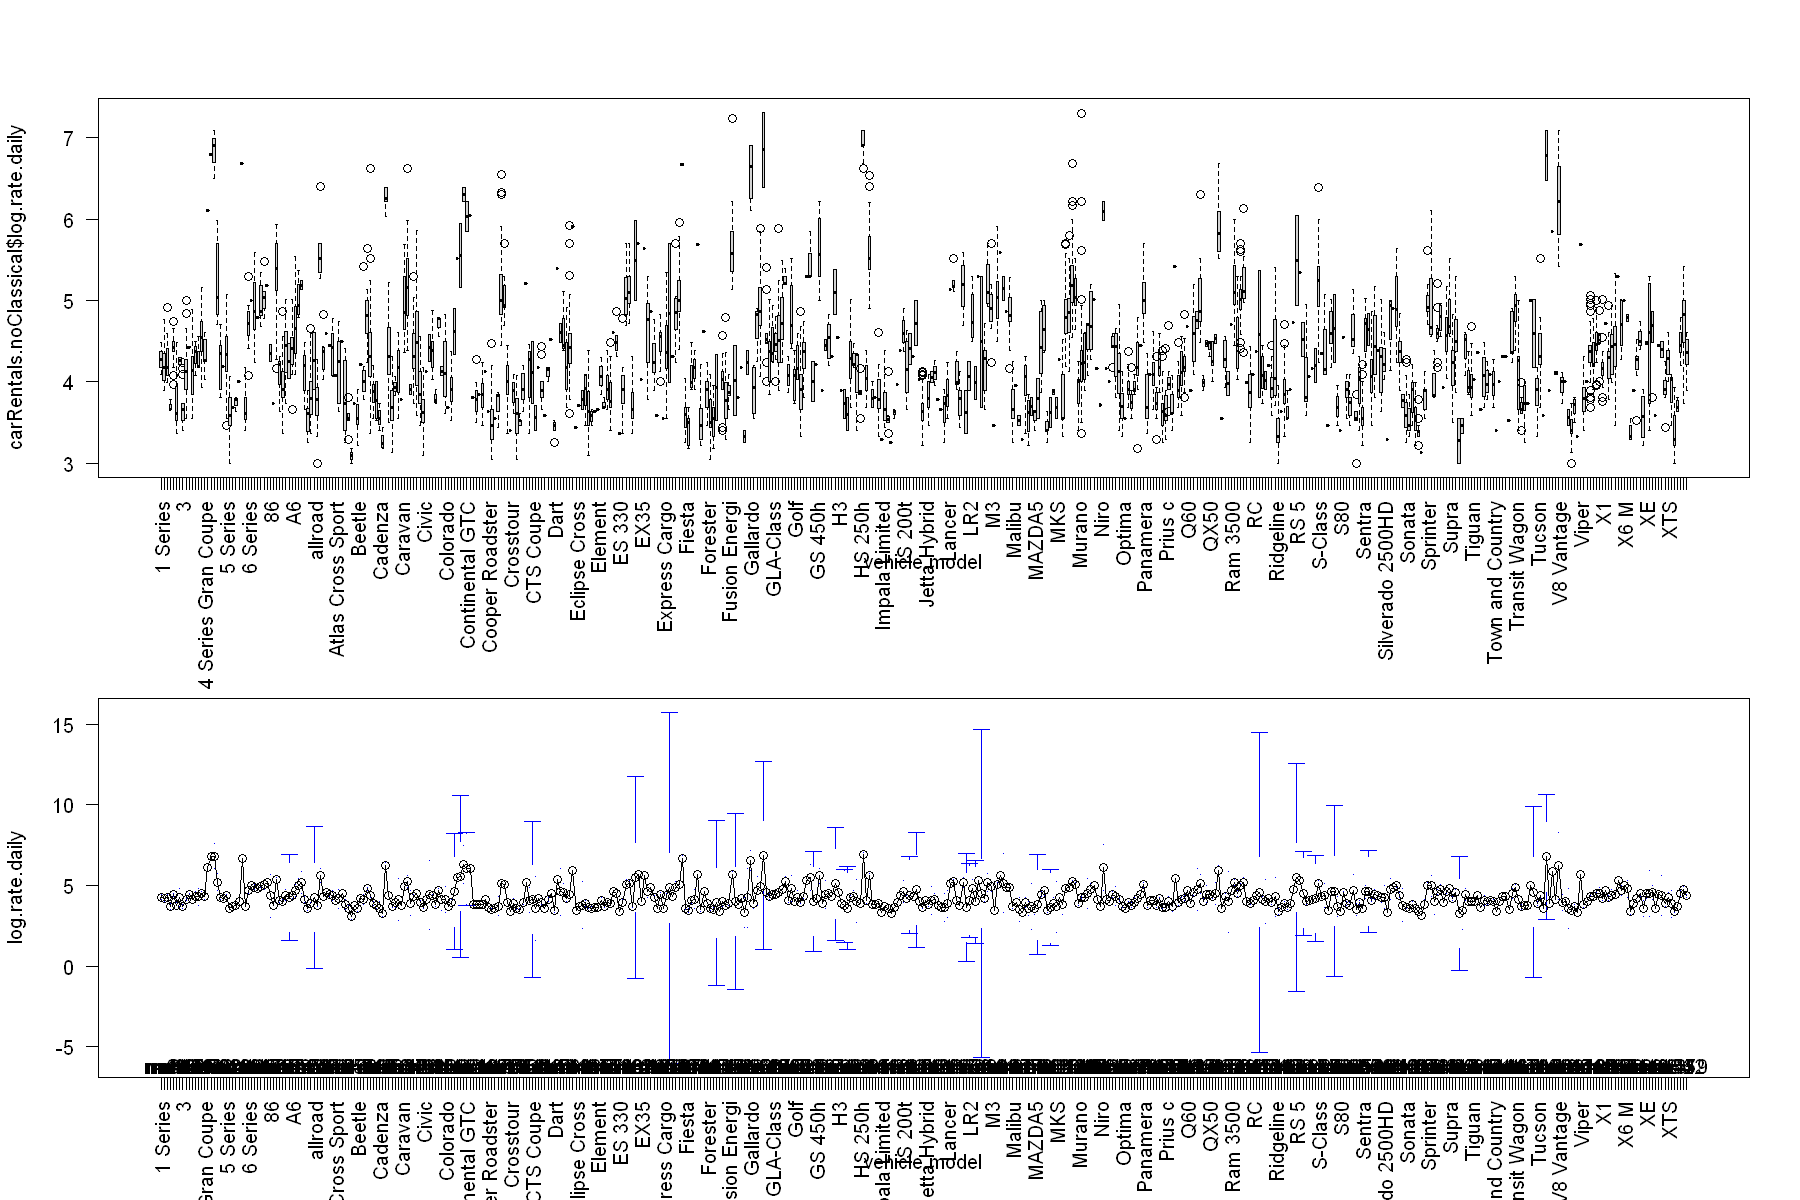

In [199]:
options(repr.plot.width=15, repr.plot.height=10)
par(mfrow=c(2,1))
boxplot(carRentals.noClassical$log.rate.daily ~ vehicle.model, data=carRentals.noClassical, las=2)
plotmeans(log.rate.daily ~ vehicle.model, data=carRentals.noClassical, las=2)

##### <span style="color: Teal;"> *2.4.2.3 Regression of log.rate.daily ~ vehicle.model* </span>

In [200]:
lm.fit <- lm(log.rate.daily ~ vehicle.model, data=carRentals.noClassical)
summary(lm.fit)


Call:
lm(formula = log.rate.daily ~ vehicle.model, data = carRentals.noClassical)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.19025 -0.19166 -0.01149  0.16945  3.05757 

Coefficients:
                                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)                           4.2776285  0.1293420  33.072  < 2e-16 ***
vehicle.model124 Spider              -0.0596280  0.1711034  -0.348 0.727485    
vehicle.model1500                    -0.0052577  0.1607932  -0.033 0.973916    
vehicle.model2                       -0.5738575  0.2240270  -2.562 0.010448 *  
vehicle.model2 Series                 0.1351503  0.1493513   0.905 0.365551    
vehicle.model200                     -0.5460590  0.1584110  -3.447 0.000571 ***
vehicle.model2500                    -0.0158421  0.2586840  -0.061 0.951170    
vehicle.model3                       -0.5872434  0.1504455  -3.903 9.60e-05 ***
vehicle.model3 Series                -0.1505061  0.1331658  -1.130 0.258436   

In [201]:
mse.usd(lm.fit)

[1] 1.321129

In [202]:
summary(aov(log.rate.daily ~ vehicle.model, data=carRentals.noClassical))

                Df Sum Sq Mean Sq F value Pr(>F)    
vehicle.model  489 1878.3   3.841   38.27 <2e-16 ***
Residuals     5343  536.3   0.100                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

#### <span style="color: #FFBF00;"> *2.4.3 Relationship of log.rate.daily ~ fuelType* </span>

##### <span style="color: Teal;"> *2.4.3.1 Problems with fuelType data* </span>

In [203]:
unique(carRentals.noClassical$fuelType)

[1] ELECTRIC HYBRID   GASOLINE          DIESEL  
Levels:  DIESEL ELECTRIC GASOLINE HYBRID

In [204]:
table(carRentals.noClassical$fuelType)


           DIESEL ELECTRIC GASOLINE   HYBRID 
      73       69      622     4795      274 

In [205]:
na.fuel.rows <- carRentals.noClassical[carRentals.noClassical$fuelType == "",][,c("vehicle.make", "vehicle.model", "vehicle.year")]
unique(na.fuel.rows)

,vehicle.make,vehicle.model,vehicle.year
,<fct>,<fct>,<dbl>
33,Ford,Fiesta,2019
152,Kia,Rio,2020
214,Toyota,Camry,2020
224,Land Rover,Range Rover,2020
225,Audi,A8,2015
329,Jeep,Wrangler Unlimited,2020
608,Land Rover,Range Rover Velar,2019
693,Polaris,Slingshot,2020
778,Lexus,ES 300h,2013


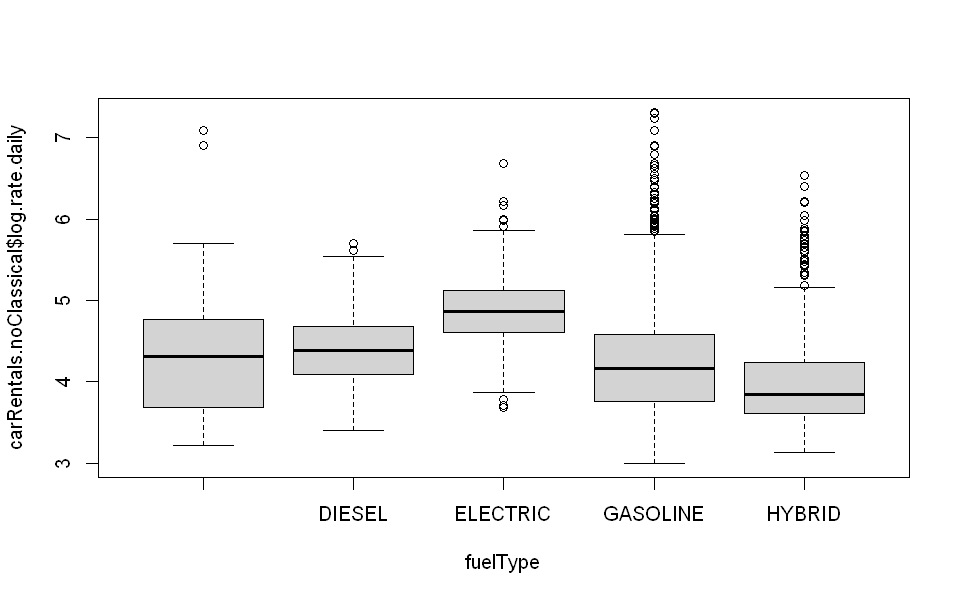

In [206]:
options(repr.plot.width=8, repr.plot.height=5)
boxplot(carRentals.noClassical$log.rate.daily ~ fuelType, data=carRentals.noClassical)

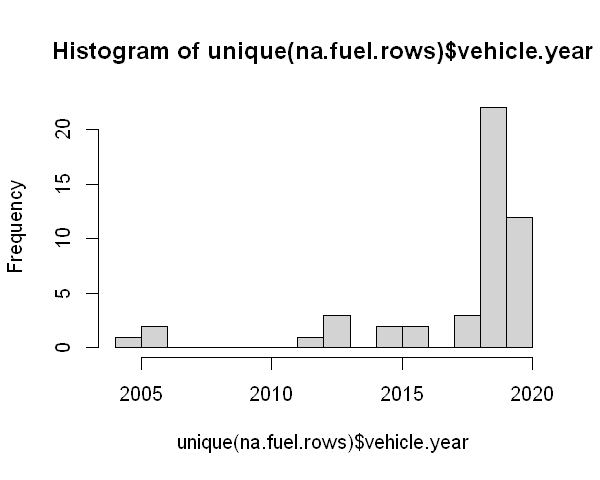

In [207]:
options(repr.plot.width=5, repr.plot.height=4)
hist(unique(na.fuel.rows)$vehicle.year, breaks=(max(unique(na.fuel.rows$vehicle.year))-min(unique(na.fuel.rows$vehicle.year))+1))

Exploring an example below, a lot of car models with missing fuelType have other entries with existing values

In [208]:
carRentals.noClassical[carRentals.noClassical$vehicle.make == "Toyota" &
    carRentals.noClassical$vehicle.model == "Camry" &
    carRentals.noClassical$vehicle.year == 2020,]

,fuelType,rating,renterTripsTaken,reviewCount,location.city,location.country,location.latitude,location.longitude,location.state,owner.id,rate.daily,vehicle.make,vehicle.model,vehicle.type,vehicle.year,airportcity,log.rate.daily
,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<fct>,<dbl>
214,,NA,0,0,Stone Mountain,US,33.76981,-84.19351,GA,5162679,67,Toyota,Camry,car,2020,Atlanta,4.204693
366,GASOLINE,5.00,26,22,Austin,US,30.28254,-97.74277,TX,526216,49,Toyota,Camry,car,2020,Austin,3.891820
370,GASOLINE,4.60,10,10,Austin,US,30.20287,-97.77119,TX,13078780,42,Toyota,Camry,car,2020,Austin,3.737670
2357,GASOLINE,4.83,10,6,Kansas City,US,39.05030,-94.68497,KS,5584584,45,Toyota,Camry,car,2020,Kansas City,3.806662
2958,GASOLINE,NA,2,0,Alameda,US,37.77811,-122.28600,CA,2625433,42,Toyota,Camry,car,2020,Oakland,3.737670
3112,HYBRID,NA,0,0,Azusa,US,34.12651,-117.89360,CA,4229573,42,Toyota,Camry,car,2020,Ontario,3.737670
3318,GASOLINE,5.00,18,14,Boynton Beach,US,26.53144,-80.08682,FL,6113037,40,Toyota,Camry,car,2020,West Palm Beach,3.688879


##### <span style="color: Teal;"> *2.4.3.2 Imputation of missing fuelType's ~ fuelType* </span>

**Impute missing fuelType with the most common one for each type (*type: c(make,model,year)*)**

In [209]:
global.fuel.mode <- as.character(Mode(carRentals.noClassical$fuelType))

In [210]:
carRentals.noClassical[rownames(na.fuel.rows),]

,fuelType,rating,renterTripsTaken,reviewCount,location.city,location.country,location.latitude,location.longitude,location.state,owner.id,rate.daily,vehicle.make,vehicle.model,vehicle.type,vehicle.year,airportcity,log.rate.daily
,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<fct>,<dbl>
33,,5.00,9,8,Augusta,US,33.36849,-81.96643,GA,11515981,47,Ford,Fiesta,car,2019,Augusta,3.850148
152,,NA,0,0,Atlanta,US,33.59502,-84.42269,GA,14917535,28,Kia,Rio,car,2020,Atlanta,3.332205
214,,NA,0,0,Stone Mountain,US,33.76981,-84.19351,GA,5162679,67,Toyota,Camry,car,2020,Atlanta,4.204693
224,,5.00,10,8,Atlanta,US,33.75328,-84.46657,GA,1886829,299,Land Rover,Range Rover,suv,2020,Atlanta,5.700444
225,,4.80,5,5,Duluth,US,34.03344,-84.18106,GA,886557,216,Audi,A8,car,2015,Atlanta,5.375278
329,,5.00,10,8,Austin,US,30.25336,-97.76515,TX,1432343,110,Jeep,Wrangler Unlimited,suv,2020,Austin,4.700480
608,,5.00,4,4,Reisterstown,US,39.43631,-76.83052,MD,1822146,221,Land Rover,Range Rover Velar,suv,2019,Baltimore,5.398163
693,,5.00,6,5,Parma,US,41.35480,-81.77162,OH,8422770,130,Polaris,Slingshot,car,2020,Cleveland,4.867534
778,,5.00,18,17,Charlotte,US,35.02538,-80.81675,NC,871050,80,Lexus,ES 300h,car,2013,Charlotte,4.382027


In [211]:
for(i in 1:nrow(na.fuel.rows)) {
  row.temp <- na.fuel.rows[i,]
  df.temp <- carRentals.noClassical[carRentals.noClassical$vehicle.make == row.temp$vehicle.make &
    carRentals.noClassical$vehicle.model == row.temp$vehicle.model &
    carRentals.noClassical$vehicle.year == row.temp$vehicle.year &
    carRentals.noClassical$fuelType != "",]
  mode.temp <- as.character(Mode(df.temp$fuelType))
  if(is.na(mode.temp) | mode.temp =="") {
    mode.temp <- global.fuel.mode
  }
  carRentals.noClassical[row.names(row.temp), "fuelType"] <- mode.temp
}

In [212]:
carRentals.noClassical[carRentals.noClassical$vehicle.make == "Toyota" &
    carRentals.noClassical$vehicle.model == "Camry" &
    carRentals.noClassical$vehicle.year == 2020,]

,fuelType,rating,renterTripsTaken,reviewCount,location.city,location.country,location.latitude,location.longitude,location.state,owner.id,rate.daily,vehicle.make,vehicle.model,vehicle.type,vehicle.year,airportcity,log.rate.daily
,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<fct>,<dbl>
214,GASOLINE,NA,0,0,Stone Mountain,US,33.76981,-84.19351,GA,5162679,67,Toyota,Camry,car,2020,Atlanta,4.204693
366,GASOLINE,5.00,26,22,Austin,US,30.28254,-97.74277,TX,526216,49,Toyota,Camry,car,2020,Austin,3.891820
370,GASOLINE,4.60,10,10,Austin,US,30.20287,-97.77119,TX,13078780,42,Toyota,Camry,car,2020,Austin,3.737670
2357,GASOLINE,4.83,10,6,Kansas City,US,39.05030,-94.68497,KS,5584584,45,Toyota,Camry,car,2020,Kansas City,3.806662
2958,GASOLINE,NA,2,0,Alameda,US,37.77811,-122.28600,CA,2625433,42,Toyota,Camry,car,2020,Oakland,3.737670
3112,HYBRID,NA,0,0,Azusa,US,34.12651,-117.89360,CA,4229573,42,Toyota,Camry,car,2020,Ontario,3.737670
3318,GASOLINE,5.00,18,14,Boynton Beach,US,26.53144,-80.08682,FL,6113037,40,Toyota,Camry,car,2020,West Palm Beach,3.688879


Confirm successful filling of empty fuelType cells

In [213]:
table(carRentals.noClassical$fuelType)


           DIESEL ELECTRIC GASOLINE   HYBRID 
       0       69      630     4860      274 

Reset factors to drop empty ""

In [214]:
carRentals.noClassical$fuelType <- droplevels(carRentals.noClassical$fuelType)

In [215]:
table(carRentals.noClassical$fuelType)


  DIESEL ELECTRIC GASOLINE   HYBRID 
      69      630     4860      274 

Warning message in arrows(x, li, x, pmax(y - gap, li), col = barcol, lwd = lwd, :
"zero-length arrow is of indeterminate angle and so skipped"
Warning message in arrows(x, ui, x, pmin(y + gap, ui), col = barcol, lwd = lwd, :
"zero-length arrow is of indeterminate angle and so skipped"


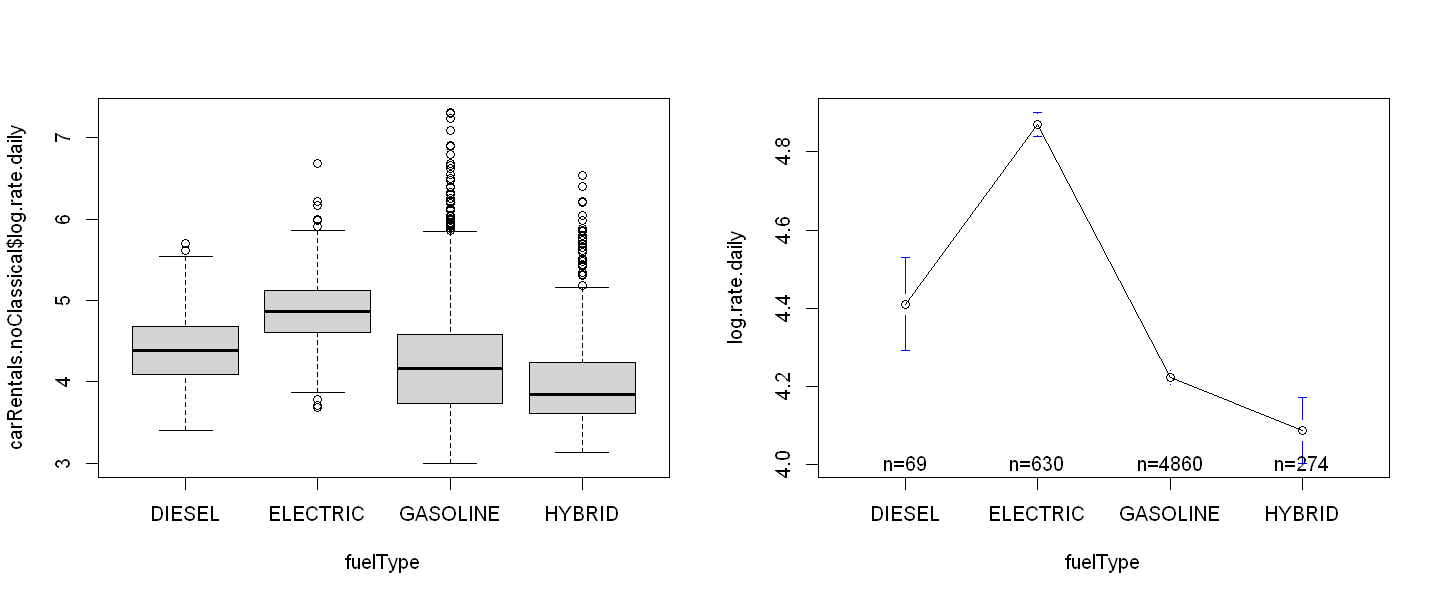

In [216]:
options(repr.plot.width=12, repr.plot.height=5)
par(mfrow=c(1,2))
boxplot(carRentals.noClassical$log.rate.daily ~ fuelType, data=carRentals.noClassical)
plotmeans(log.rate.daily ~ fuelType, data=carRentals.noClassical)

##### <span style="color: Teal;"> *2.4.3.3 Regression of log.rate.daily ~ fuelType* </span>

In [217]:
lm.fit <- lm(log.rate.daily ~ fuelType, data=carRentals.noClassical)
summary(lm.fit)


Call:
lm(formula = log.rate.daily ~ fuelType, data = carRentals.noClassical)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.22587 -0.43741 -0.06272  0.33227  3.09162 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       4.40981    0.07341  60.071  < 2e-16 ***
fuelTypeELECTRIC  0.46038    0.07733   5.954 2.77e-09 ***
fuelTypeGASOLINE -0.18821    0.07393  -2.546   0.0109 *  
fuelTypeHYBRID   -0.32302    0.08214  -3.933 8.50e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6098 on 5829 degrees of freedom
Multiple R-squared:  0.1023,	Adjusted R-squared:  0.1019 
F-statistic: 221.5 on 3 and 5829 DF,  p-value: < 2.2e-16


In [218]:
mse.usd(lm.fit)

[1] 3.430819

In [219]:
mae.usd(lm.fit)

[1] 1.263996

In [220]:
summary(aov(log.rate.daily ~ fuelType, data=carRentals.noClassical))

              Df Sum Sq Mean Sq F value Pr(>F)    
fuelType       3  247.1   82.36   221.5 <2e-16 ***
Residuals   5829 2167.5    0.37                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

fuelType is a significantly explanative feature

#### <span style="color: #FFBF00;"> *2.4.4 Relationship of log.rate.daily ~ vehicle.type* </span>

In [221]:
unique(carRentals.noClassical$vehicle.type)

[1] suv     car     truck   minivan van    
Levels: car minivan suv truck van

In [222]:
table(carRentals.noClassical$vehicle.type)


    car minivan     suv   truck     van 
   3641     232    1714     191      55 

Warning message in arrows(x, li, x, pmax(y - gap, li), col = barcol, lwd = lwd, :
"zero-length arrow is of indeterminate angle and so skipped"
Warning message in arrows(x, ui, x, pmin(y + gap, ui), col = barcol, lwd = lwd, :
"zero-length arrow is of indeterminate angle and so skipped"


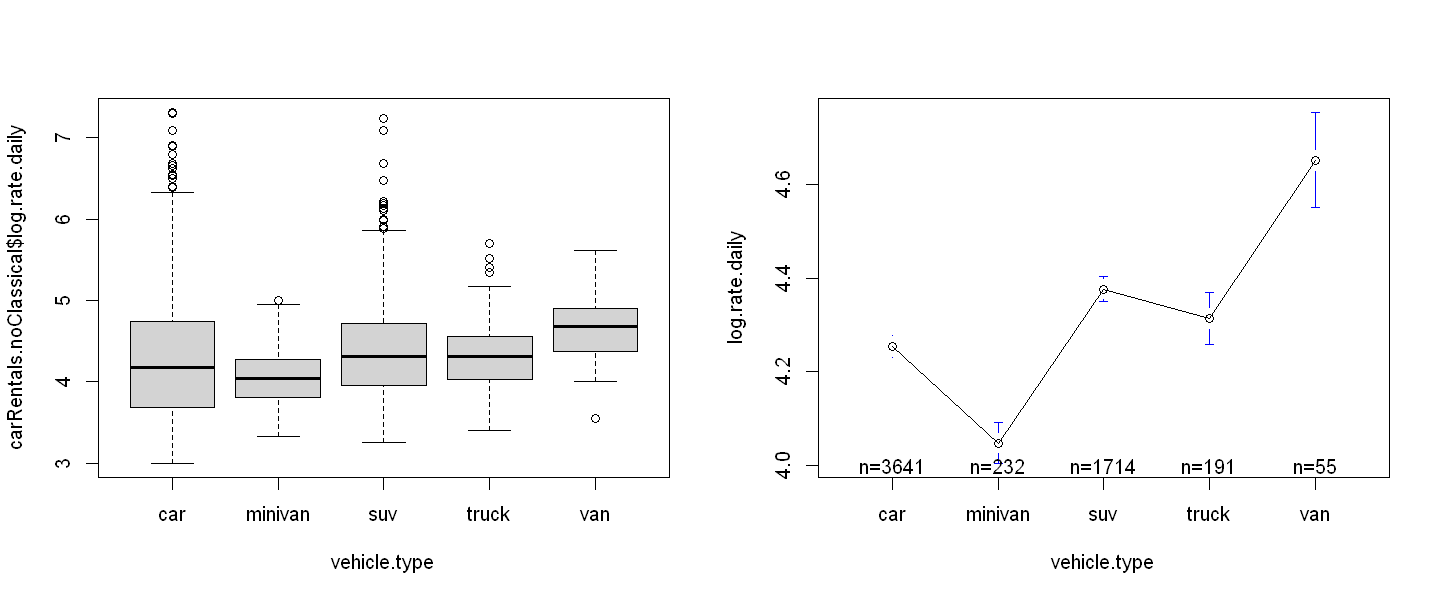

In [223]:
options(repr.plot.width=12, repr.plot.height=5)
par(mfrow=c(1,2))
boxplot(carRentals.noClassical$log.rate.daily ~ vehicle.type, data=carRentals.noClassical)
plotmeans(log.rate.daily ~ vehicle.type, data=carRentals.noClassical)

In [224]:
lm.fit <- lm(log.rate.daily ~ vehicle.type, data=carRentals.noClassical)
summary(lm.fit)


Call:
lm(formula = log.rate.daily ~ vehicle.type, data = carRentals.noClassical)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.25817 -0.48506 -0.06425  0.40224  3.05932 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)          4.25390    0.01058 402.014  < 2e-16 ***
vehicle.typeminivan -0.20652    0.04323  -4.777 1.82e-06 ***
vehicle.typesuv      0.12298    0.01870   6.575 5.28e-11 ***
vehicle.typetruck    0.05987    0.04740   1.263    0.207    
vehicle.typevan      0.39895    0.08674   4.599 4.33e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6385 on 5828 degrees of freedom
Multiple R-squared:  0.01601,	Adjusted R-squared:  0.01533 
F-statistic:  23.7 on 4 and 5828 DF,  p-value: < 2.2e-16


In [225]:
summary(aov(log.rate.daily ~ vehicle.type, data=carRentals.noClassical))

               Df Sum Sq Mean Sq F value Pr(>F)    
vehicle.type    4   38.7   9.663    23.7 <2e-16 ***
Residuals    5828 2375.9   0.408                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

vehicle.type is a significantly explanative feature

### <span style="color: LightSalmon;"> *2.5 Creation of New Features* </span>

#### <span style="color: #FFBF00;"> *2.5.1 city.has.airport <- location.city==airportcity* </span>

In [226]:
carRentals.noClassical$city.has.airport <- as.character(carRentals.noClassical$location.city) == as.character(carRentals.noClassical$airportcity)

In [227]:
table(carRentals.noClassical$city.has.airport)


FALSE  TRUE 
 3032  2801 

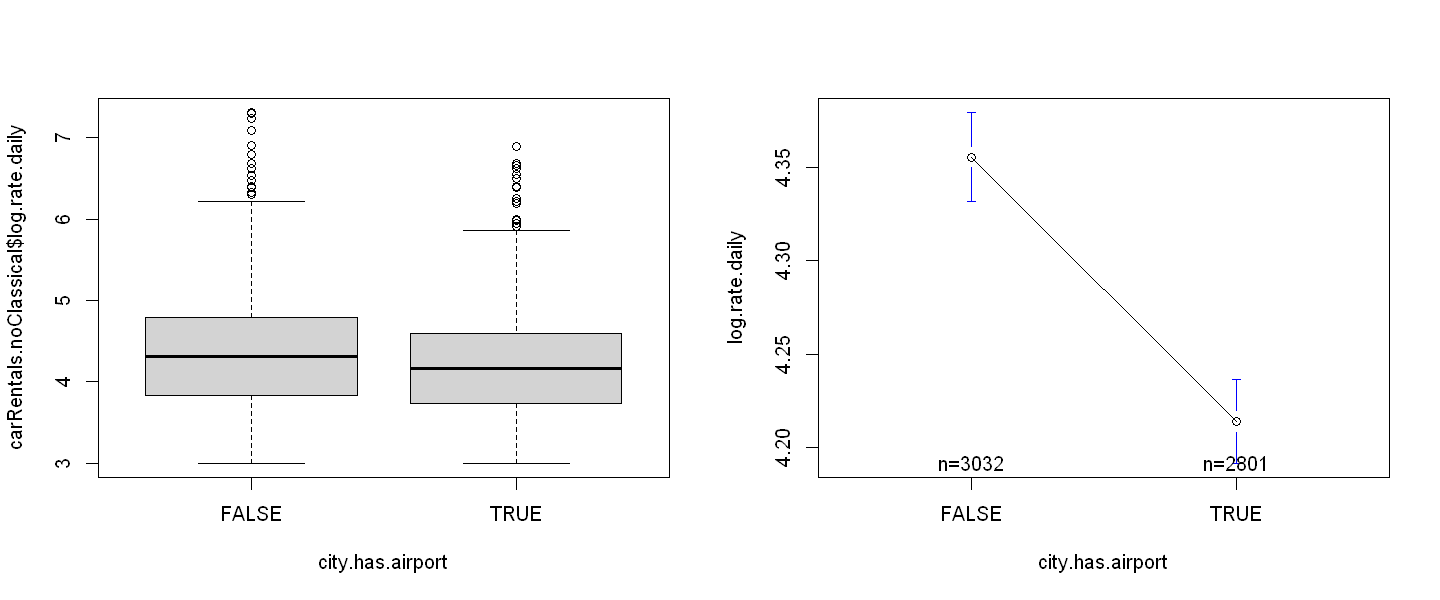

In [228]:
options(repr.plot.width=12, repr.plot.height=5)
par(mfrow=c(1,2))
boxplot(carRentals.noClassical$log.rate.daily ~ city.has.airport, data=carRentals.noClassical)
plotmeans(log.rate.daily ~ city.has.airport, data=carRentals.noClassical)

In [229]:
lm.fit <- lm(log.rate.daily ~ city.has.airport, data=carRentals.noClassical)
summary(lm.fit)


Call:
lm(formula = log.rate.daily ~ city.has.airport, data = carRentals.noClassical)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.35965 -0.50054 -0.05132  0.40679  2.95783 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)           4.35539    0.01162 374.948   <2e-16 ***
city.has.airportTRUE -0.14127    0.01676  -8.428   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6396 on 5831 degrees of freedom
Multiple R-squared:  0.01203,	Adjusted R-squared:  0.01187 
F-statistic: 71.03 on 1 and 5831 DF,  p-value: < 2.2e-16


In [230]:
mse.usd(lm.fit)

[1] 3.205366

city.has.airport is a significantly explanative feature

## <span style="color: IndianRed;"> 3. Modelling </span>

#### <span style="color: LightSalmon;"> *3.1 Develop overall Linear Regression Model* </span>

##### <span style="color: Teal;"> *3.1.1 Fit Linear Regression Model with All Numerical Features* </span>

In [231]:
full.model <- lm(log.rate.daily ~ vehicle.year + rating + reviewCount + renterTripsTaken, data=carRentals.noClassical)
summary(full.model)


Call:
lm(formula = log.rate.daily ~ vehicle.year + rating + reviewCount + 
    renterTripsTaken, data = carRentals.noClassical)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.3662 -0.4545 -0.0631  0.3684  3.2122 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -97.151973   5.155530 -18.844  < 2e-16 ***
vehicle.year       0.049598   0.002568  19.311  < 2e-16 ***
rating             0.302167   0.045948   6.576 5.28e-11 ***
reviewCount        0.007923   0.002120   3.738 0.000188 ***
renterTripsTaken  -0.007395   0.001781  -4.153 3.33e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6026 on 5333 degrees of freedom
  (495 observations deleted due to missingness)
Multiple R-squared:  0.0961,	Adjusted R-squared:  0.09542 
F-statistic: 141.8 on 4 and 5333 DF,  p-value: < 2.2e-16


In [232]:
mse.usd(full.model)

[1] 3.134835

##### <span style="color: Teal;"> *3.1.2 Fit Linear Regression Model with All Categorical Features* </span>

**With make, without model**

In [233]:
full.model <- lm(log.rate.daily ~ fuelType + vehicle.type + city.has.airport + vehicle.make, data=carRentals.noClassical)
summary(full.model)


Call:
lm(formula = log.rate.daily ~ fuelType + vehicle.type + city.has.airport + 
    vehicle.make, data = carRentals.noClassical)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.4566 -0.2854 -0.0402  0.2335  3.2805 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                4.1051163  0.0846072  48.520  < 2e-16 ***
fuelTypeELECTRIC           0.0731256  0.0945423   0.773 0.439276    
fuelTypeGASOLINE           0.0713591  0.0560565   1.273 0.203074    
fuelTypeHYBRID             0.1542717  0.0631220   2.444 0.014554 *  
vehicle.typeminivan        0.1798460  0.0334128   5.383 7.63e-08 ***
vehicle.typesuv            0.1668522  0.0147690  11.297  < 2e-16 ***
vehicle.typetruck          0.3492786  0.0358081   9.754  < 2e-16 ***
vehicle.typevan            0.4805187  0.0616219   7.798 7.42e-15 ***
city.has.airportTRUE      -0.0863223  0.0116565  -7.406 1.49e-13 ***
vehicle.makeAlfa Romeo     0.5144162  0.1018362   5.051 4.52e-07 ***


In [234]:
mse.usd(full.model)

[1] 1.84668

**With model, without make**

In [235]:
full.model <- lm(log.rate.daily ~ fuelType + vehicle.type + city.has.airport + vehicle.model, data=carRentals.noClassical)
summary(full.model)


Call:
lm(formula = log.rate.daily ~ fuelType + vehicle.type + city.has.airport + 
    vehicle.model, data = carRentals.noClassical)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.2100 -0.1894 -0.0089  0.1715  3.0253 

Coefficients: (2 not defined because of singularities)
                                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)                           4.384524   0.136908  32.025  < 2e-16 ***
fuelTypeELECTRIC                      0.146177   0.122401   1.194 0.232433    
fuelTypeGASOLINE                     -0.037716   0.046718  -0.807 0.419519    
fuelTypeHYBRID                       -0.012020   0.061398  -0.196 0.844792    
vehicle.typeminivan                   1.040527   0.326660   3.185 0.001454 ** 
vehicle.typesuv                       0.030371   0.096460   0.315 0.752883    
vehicle.typetruck                     0.058170   0.149579   0.389 0.697373    
vehicle.typevan                       0.586415   0.159757   3.671 0.000244 ***
city.h

In [236]:
mse.usd(full.model)

[1] 1.310457

**With both model and make**

In [237]:
full.model <- lm(log.rate.daily ~ fuelType + vehicle.type + city.has.airport + vehicle.make + vehicle.model, data=carRentals.noClassical)
summary(full.model)


Call:
lm(formula = log.rate.daily ~ fuelType + vehicle.type + city.has.airport + 
    vehicle.make + vehicle.model, data = carRentals.noClassical)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.2100 -0.1894 -0.0089  0.1715  3.0253 

Coefficients: (52 not defined because of singularities)
                                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)                           3.823208   0.127840  29.906  < 2e-16 ***
fuelTypeELECTRIC                      0.146177   0.122401   1.194 0.232433    
fuelTypeGASOLINE                     -0.037716   0.046718  -0.807 0.419519    
fuelTypeHYBRID                       -0.012020   0.061398  -0.196 0.844792    
vehicle.typeminivan                   1.040527   0.326660   3.185 0.001454 ** 
vehicle.typesuv                       0.030371   0.096460   0.315 0.752883    
vehicle.typetruck                     0.665512   0.174891   3.805 0.000143 ***
vehicle.typevan                       2.378210   0.463474   5.131 2.9

In [238]:
mse.usd(full.model)

[1] 1.310457

##### <span style="color: Teal;"> *3.1.3 Fit Linear Regression Model with All Chosen Features* </span>

**With both make and model**

In [239]:
full.model <- lm(log.rate.daily ~ vehicle.year + rating + reviewCount + renterTripsTaken +
    fuelType + vehicle.type + city.has.airport + vehicle.make + vehicle.model, data=carRentals.noClassical)
summary(full.model)


Call:
lm(formula = log.rate.daily ~ vehicle.year + rating + reviewCount + 
    renterTripsTaken + fuelType + vehicle.type + city.has.airport + 
    vehicle.make + vehicle.model, data = carRentals.noClassical)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.02258 -0.17361 -0.01201  0.14867  1.39485 

Coefficients: (52 not defined because of singularities)
                                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)                          -7.321e+01  3.127e+00 -23.416  < 2e-16 ***
vehicle.year                          3.828e-02  1.559e-03  24.549  < 2e-16 ***
rating                                1.765e-02  2.270e-02   0.777 0.436943    
reviewCount                          -7.798e-04  1.072e-03  -0.727 0.467141    
renterTripsTaken                      5.396e-04  9.010e-04   0.599 0.549260    
fuelTypeELECTRIC                      1.305e-02  1.254e-01   0.104 0.917147    
fuelTypeGASOLINE                     -5.347e-02  4.562e-02  -1.172 0.

In [240]:
mse.usd(full.model)

[1] 1.181678

**With make, without model**

In [241]:
full.model <- lm(log.rate.daily ~ vehicle.year + rating + reviewCount + renterTripsTaken +
    fuelType + vehicle.type + city.has.airport + vehicle.make, data=carRentals.noClassical)
summary(full.model)


Call:
lm(formula = log.rate.daily ~ vehicle.year + rating + reviewCount + 
    renterTripsTaken + fuelType + vehicle.type + city.has.airport + 
    vehicle.make, data = carRentals.noClassical)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.33995 -0.27073 -0.04404  0.22163  2.20104 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)               -76.856173   3.734600 -20.579  < 2e-16 ***
vehicle.year                0.039847   0.001860  21.421  < 2e-16 ***
rating                      0.135395   0.031274   4.329 1.52e-05 ***
reviewCount                 0.004243   0.001453   2.920 0.003515 ** 
renterTripsTaken           -0.003507   0.001219  -2.877 0.004030 ** 
fuelTypeELECTRIC           -0.031750   0.099239  -0.320 0.749027    
fuelTypeGASOLINE            0.054288   0.055570   0.977 0.328647    
fuelTypeHYBRID              0.159444   0.062201   2.563 0.010393 *  
vehicle.typeminivan         0.235633   0.031919   7.382 1.80e-13 *

In [242]:
mse.usd(full.model)

[1] 1.562142

Warning message:
"not plotting observations with leverage one:
  15, 1261, 4651"


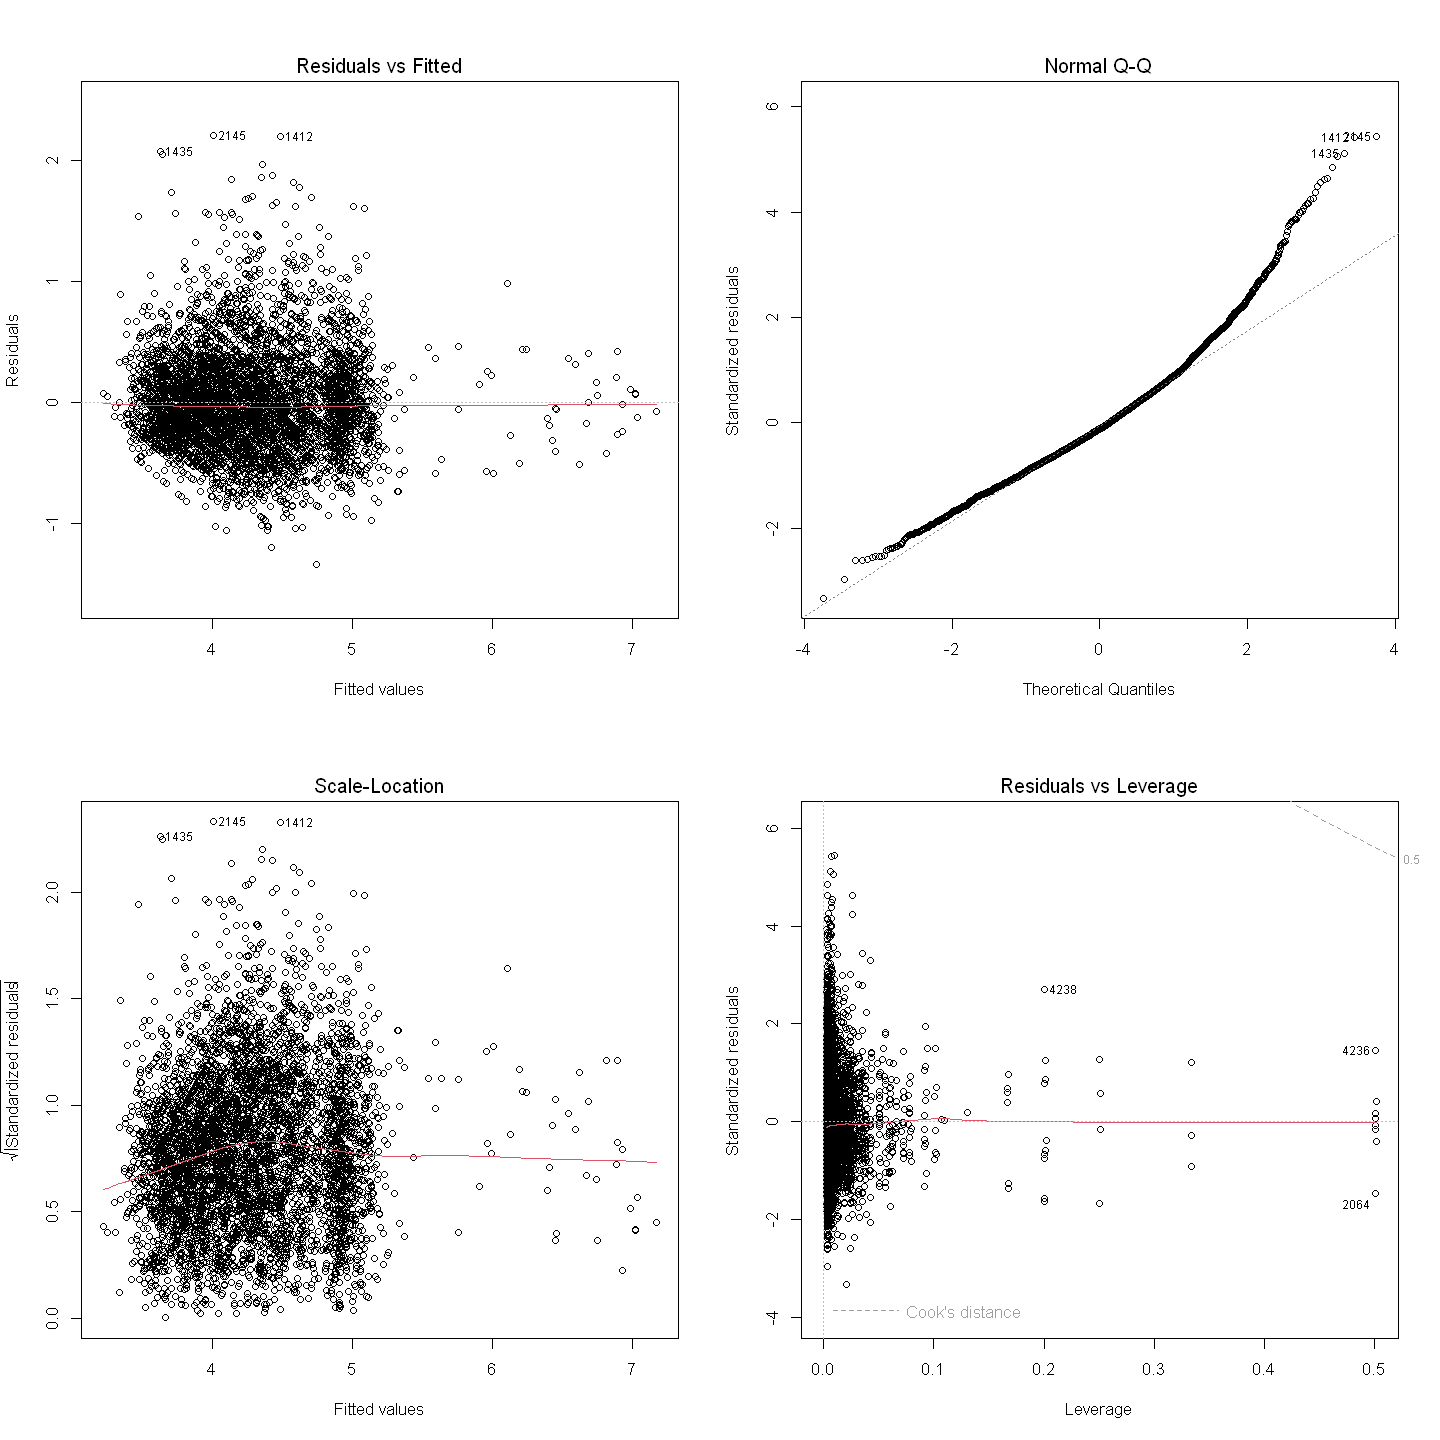

In [246]:
options(repr.plot.width=12, repr.plot.height=12)
par(mfrow=c(2,2))
plot(full.model)

**Without make, with model**

In [156]:
full.model <- lm(log.rate.daily ~ vehicle.year + rating + reviewCount + renterTripsTaken +
    fuelType + vehicle.type + city.has.airport + vehicle.model, data=carRentals.noClassical)
summary(full.model)


Call:
lm(formula = log.rate.daily ~ vehicle.year + rating + reviewCount + 
    renterTripsTaken + fuelType + vehicle.type + city.has.airport + 
    vehicle.model, data = carRentals.noClassical)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.02258 -0.17361 -0.01201  0.14867  1.39485 

Coefficients: (2 not defined because of singularities)
                                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)                          -7.267e+01  3.127e+00 -23.238  < 2e-16 ***
vehicle.year                          3.828e-02  1.559e-03  24.549  < 2e-16 ***
rating                                1.765e-02  2.270e-02   0.777 0.436943    
reviewCount                          -7.797e-04  1.072e-03  -0.727 0.467141    
renterTripsTaken                      5.396e-04  9.010e-04   0.599 0.549260    
fuelTypeELECTRIC                      1.305e-02  1.254e-01   0.104 0.917147    
fuelTypeGASOLINE                     -5.347e-02  4.562e-02  -1.172 0.241301    
fuelT

In [157]:
mse.usd(full.model)

[1] 1.181678

Warning message:
"not plotting observations with leverage one:
  9, 16, 52, 69, 265, 310, 361, 362, 363, 582, 782, 790, 841, 1176, 1193, 1261, 1304, 1368, 1452, 1453, 1462, 1477, 1487, 1558, 1625, 1645, 1667, 1671, 1681, 1804, 1817, 1877, 2044, 2153, 2166, 2274, 2292, 2336, 2387, 2433, 2498, 2503, 2632, 2723, 2846, 3075, 3136, 3240, 3348, 3376, 3408, 3461, 3472, 3524, 3529, 3595, 3607, 3725, 3791, 3827, 3832, 3951, 4015, 4032, 4052, 4144, 4298, 4376, 4437, 4477, 4497, 4566, 4597, 4651, 4652, 4656, 4664, 4707, 4765, 4798, 4840, 4888, 4906, 4944, 5053, 5150, 5166, 5286, 5313, 5321"
Warning message in sqrt(crit * p * (1 - hh)/hh):
"NaNs produced"
Warning message in sqrt(crit * p * (1 - hh)/hh):
"NaNs produced"


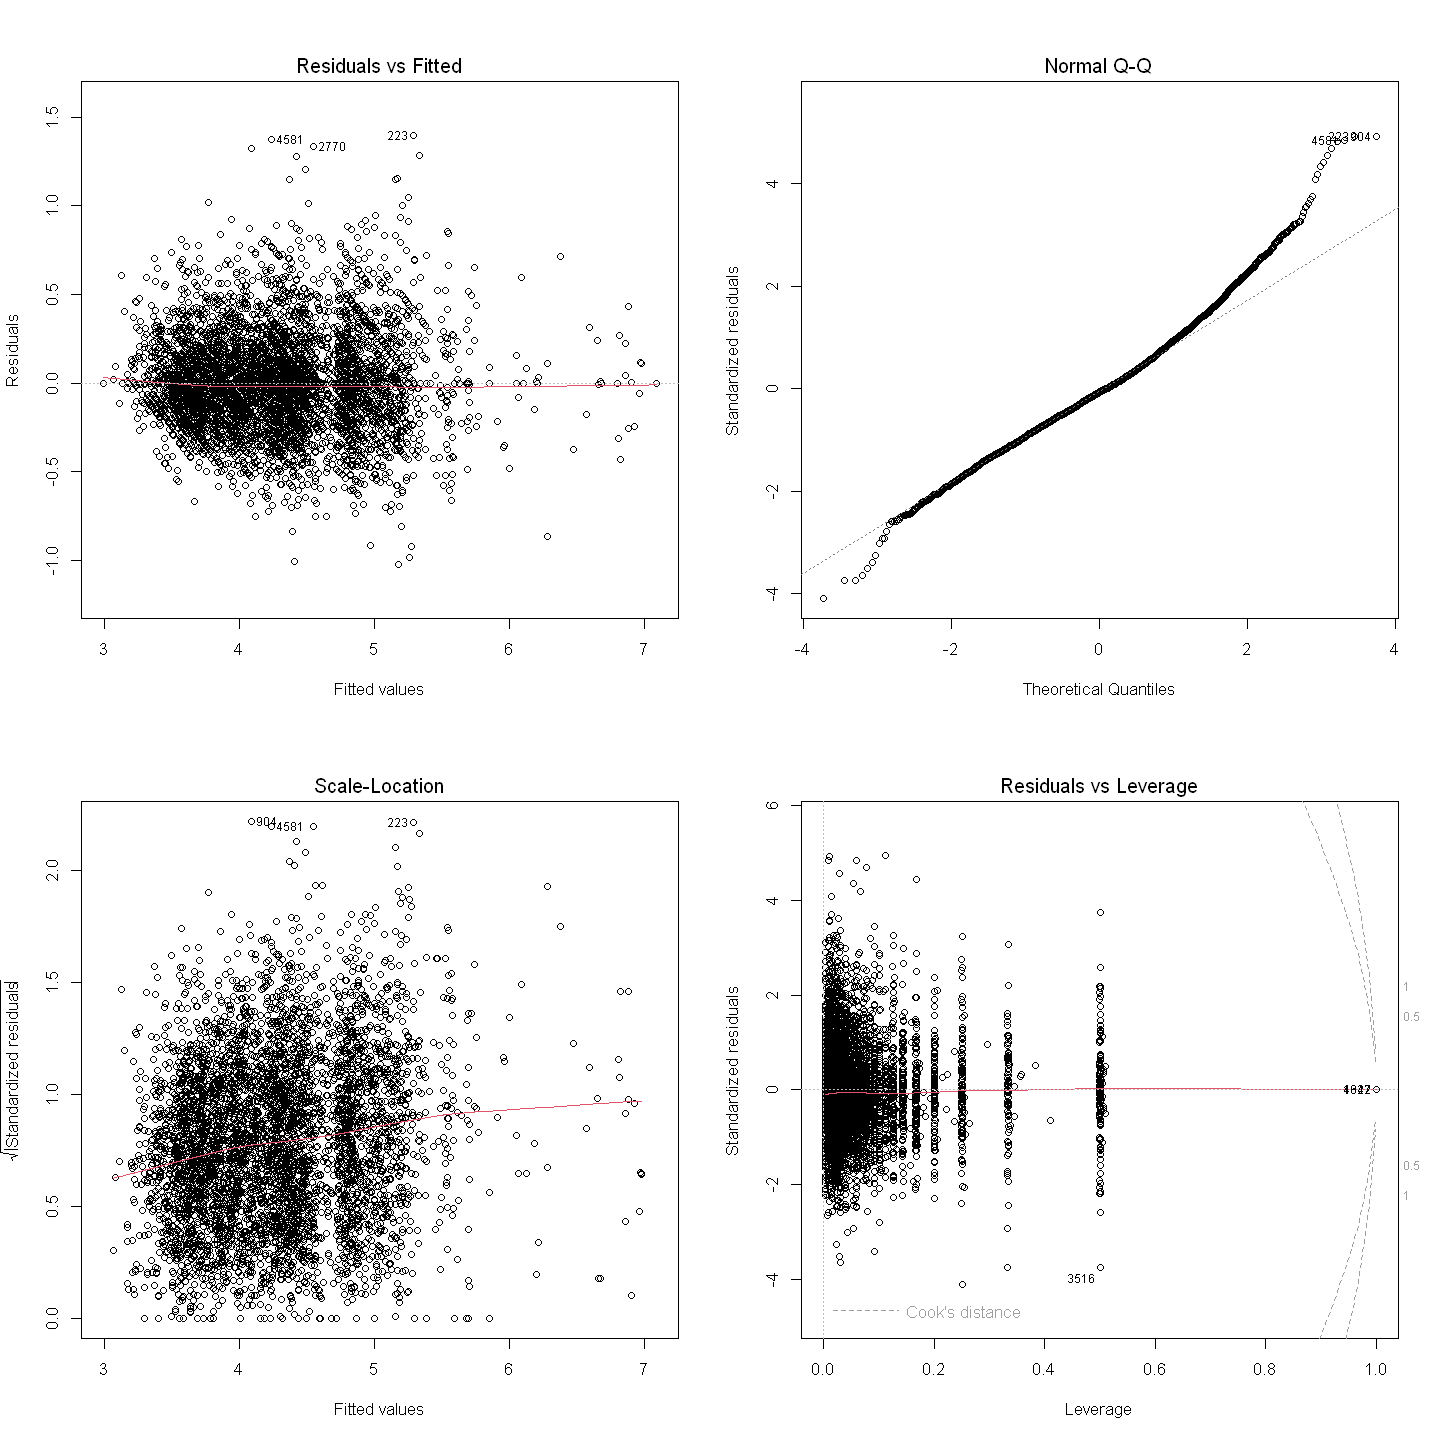

In [158]:
options(repr.plot.width=12, repr.plot.height=12)
par(mfrow=c(2,2))
plot(full.model)

##### <span style="color: Teal;"> *3.1.2 Check Multicolliniarity* </span>

In [159]:
names(full.model)

[1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "na.action"     "contrasts"     "xlevels"       "call"         
[13] "terms"         "model"

**Identify dummy variables that cause multicollineariy issue**

In [160]:
alias(full.model)

Model :
log.rate.daily ~ vehicle.year + rating + reviewCount + renterTripsTaken + 
    fuelType + vehicle.type + city.has.airport + vehicle.model

Complete :
                           (Intercept) vehicle.year rating reviewCount
vehicle.modelTransit Wagon  0           0            0      0         
vehicle.modelTundra         0           0            0      0         
                           renterTripsTaken fuelTypeELECTRIC fuelTypeGASOLINE
vehicle.modelTransit Wagon  0                0                0              
vehicle.modelTundra         0                0                0              
                           fuelTypeHYBRID vehicle.typeminivan vehicle.typesuv
vehicle.modelTransit Wagon  0              0                   0             
vehicle.modelTundra         0              0                   0             
                           vehicle.typetruck vehicle.typevan
vehicle.modelTransit Wagon  0                 1             
vehicle.modelTundra         1          

Our set of features suffer from multicollinearity problem. <br>Stepwise feature selection will be applied to eliminate least explanative features in hope of reducing the muticollinearity problem.

##### <span style="color: Teal;"> *3.1.3 Stepwise Linear Regression Model* </span>

In [164]:
step.model <- stepAIC(full.model, direction="both", trace=FALSE, k=20)
summary(step.model)


Call:
lm(formula = log.rate.daily ~ vehicle.year + rating + fuelType + 
    city.has.airport, data = carRentals.noClassical)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.3367 -0.4137 -0.0629  0.3008  3.1962 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -75.428777   5.010410 -15.054  < 2e-16 ***
vehicle.year           0.038904   0.002498  15.571  < 2e-16 ***
rating                 0.300401   0.043825   6.855 7.96e-12 ***
fuelTypeELECTRIC       0.352351   0.078271   4.502 6.88e-06 ***
fuelTypeGASOLINE      -0.191454   0.074615  -2.566 0.010319 *  
fuelTypeHYBRID        -0.273498   0.082527  -3.314 0.000926 ***
city.has.airportTRUE  -0.104428   0.015864  -6.583 5.06e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5783 on 5331 degrees of freedom
  (495 observations deleted due to missingness)
Multiple R-squared:  0.1677,	Adjusted R-squared:  0.1668 
F-statistic: 179.1 o

In [163]:
mse.usd(step.model)

[1] 3.151059

A comparable Adjusted R<sup>2</sup> is achieved (0.5864 vs 0.5880) even when fuelType, reviewCount, and retnerTripsTaken are dropped.

In [165]:
vif(step.model)

,GVIF,Df,GVIF^(1/(2*Df))
vehicle.year,1.091728,1,1.044858
rating,1.021773,1,1.010828
fuelType,1.075075,3,1.012138
city.has.airport,1.003512,1,1.001755


In [166]:
sqrt(vif(step.model))

,GVIF,Df,GVIF^(1/(2*Df))
vehicle.year,1.044858,1.000000,1.022183
rating,1.010828,1.000000,1.005399
fuelType,1.036858,1.732051,1.006051
city.has.airport,1.001755,1.000000,1.000877


The stepwise linear regression model no longer suffers from a multicollinearity problem as none of the features in  have sqrt(VIF) > 2

#### <span style="color: LightSalmon;"> *3.2 Diagnostics* </span>

In [173]:
summary(full.model$residuals)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-1.02258 -0.17361 -0.01201  0.00000  0.14867  1.39485 

In [185]:
summary(step.model$residuals)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-1.3367 -0.4137 -0.0629  0.0000  0.3008  3.1962 

In [183]:
shapiro.test(sample(full.model$residuals, 2000, replace=FALSE))


	Shapiro-Wilk normality test

data:  sample(full.model$residuals, 2000, replace = FALSE)
W = 0.9785, p-value < 2.2e-16


In [184]:
shapiro.test(sample(step.model$residuals, 2000, replace=FALSE))


	Shapiro-Wilk normality test

data:  sample(step.model$residuals, 2000, replace = FALSE)
W = 0.95381, p-value < 2.2e-16


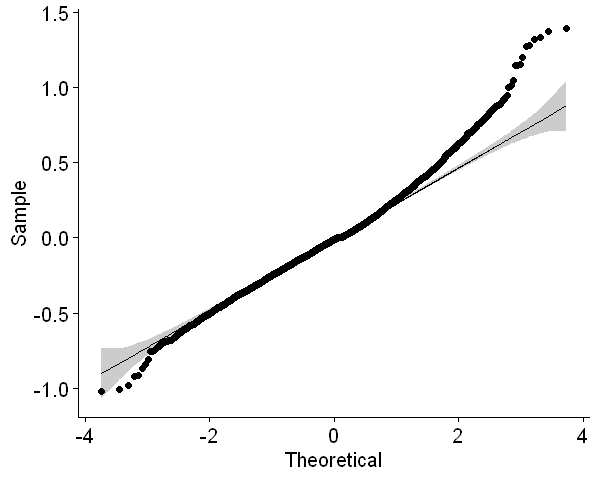

In [175]:
options(repr.plot.width=5, repr.plot.height=4)
ggqqplot(full.model$residuals)

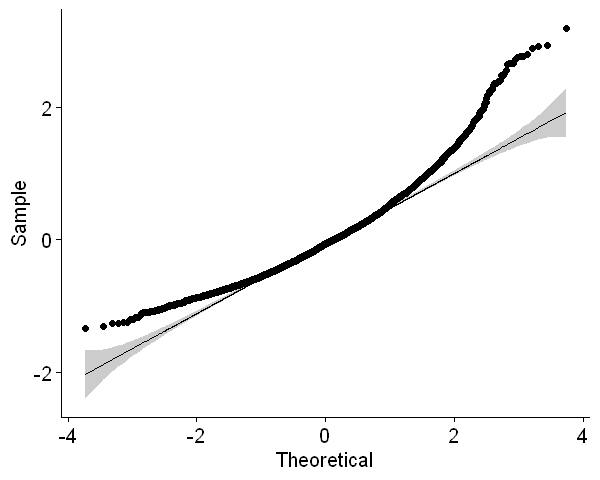

In [181]:
options(repr.plot.width=5, repr.plot.height=4)
ggqqplot(step.model$residuals)

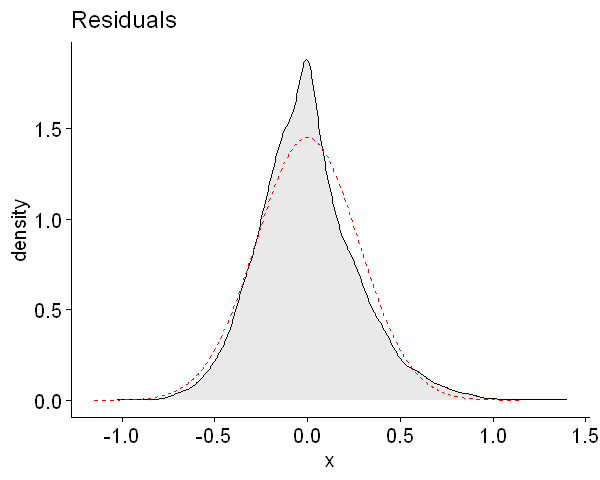

In [186]:
ggdensity(full.model$residuals, fill="lightgray", title="Residuals") +
  stat_overlay_normal_density(color = "red", linetype = "dashed")

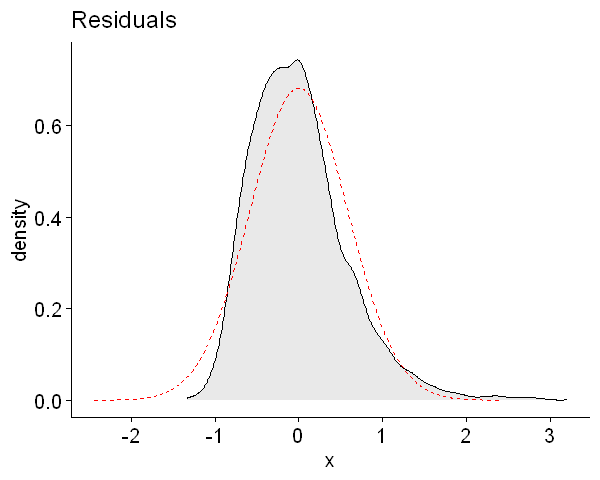

In [187]:
ggdensity(step.model$residuals, fill="lightgray", title="Residuals") +
  stat_overlay_normal_density(color = "red", linetype = "dashed")

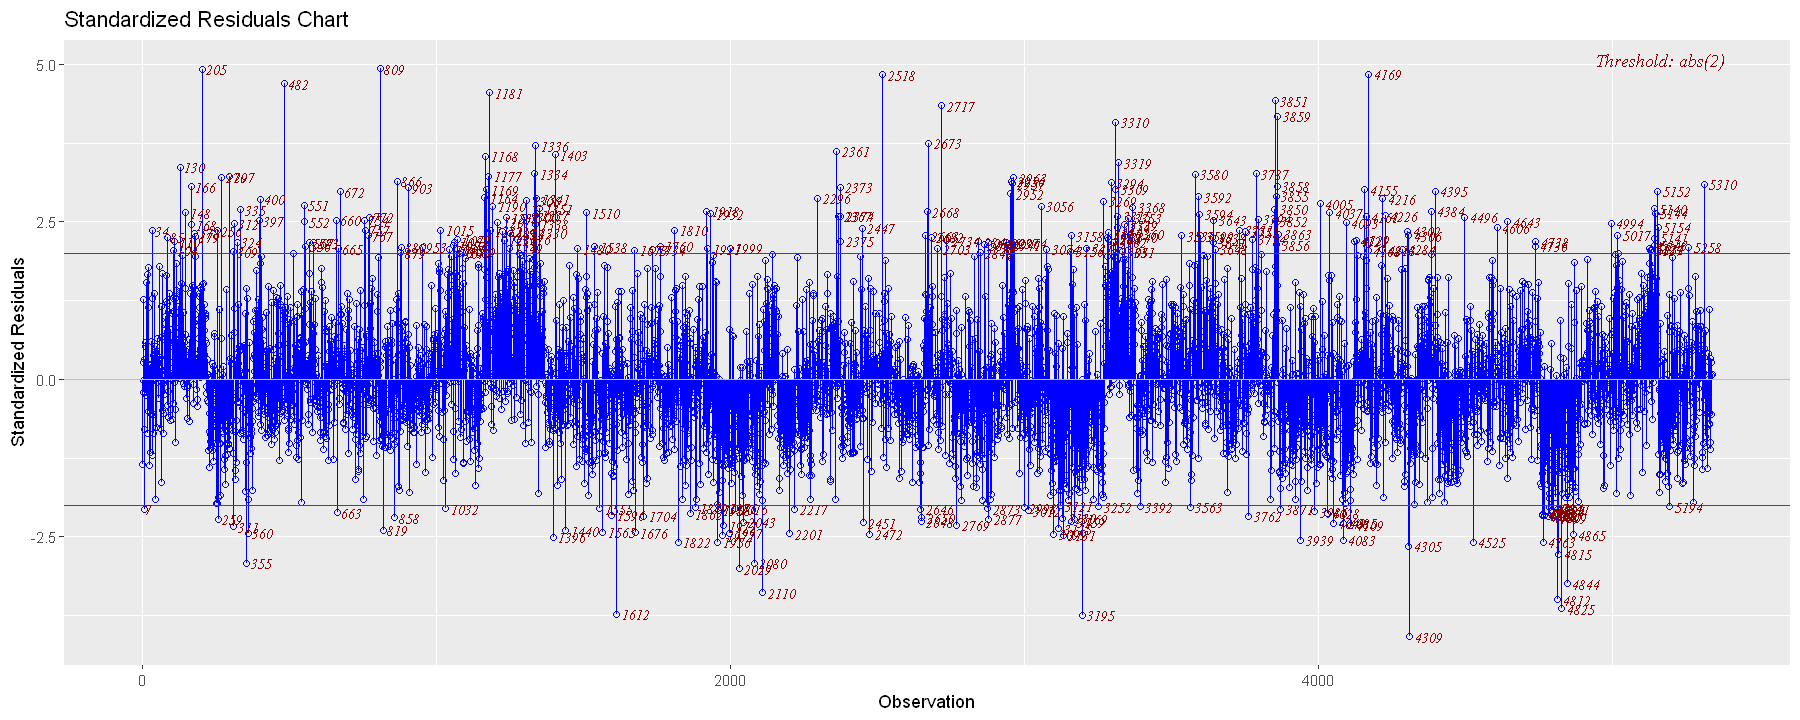

In [188]:
options(repr.plot.width=15, repr.plot.height=6)
ols_plot_resid_stand(full.model)

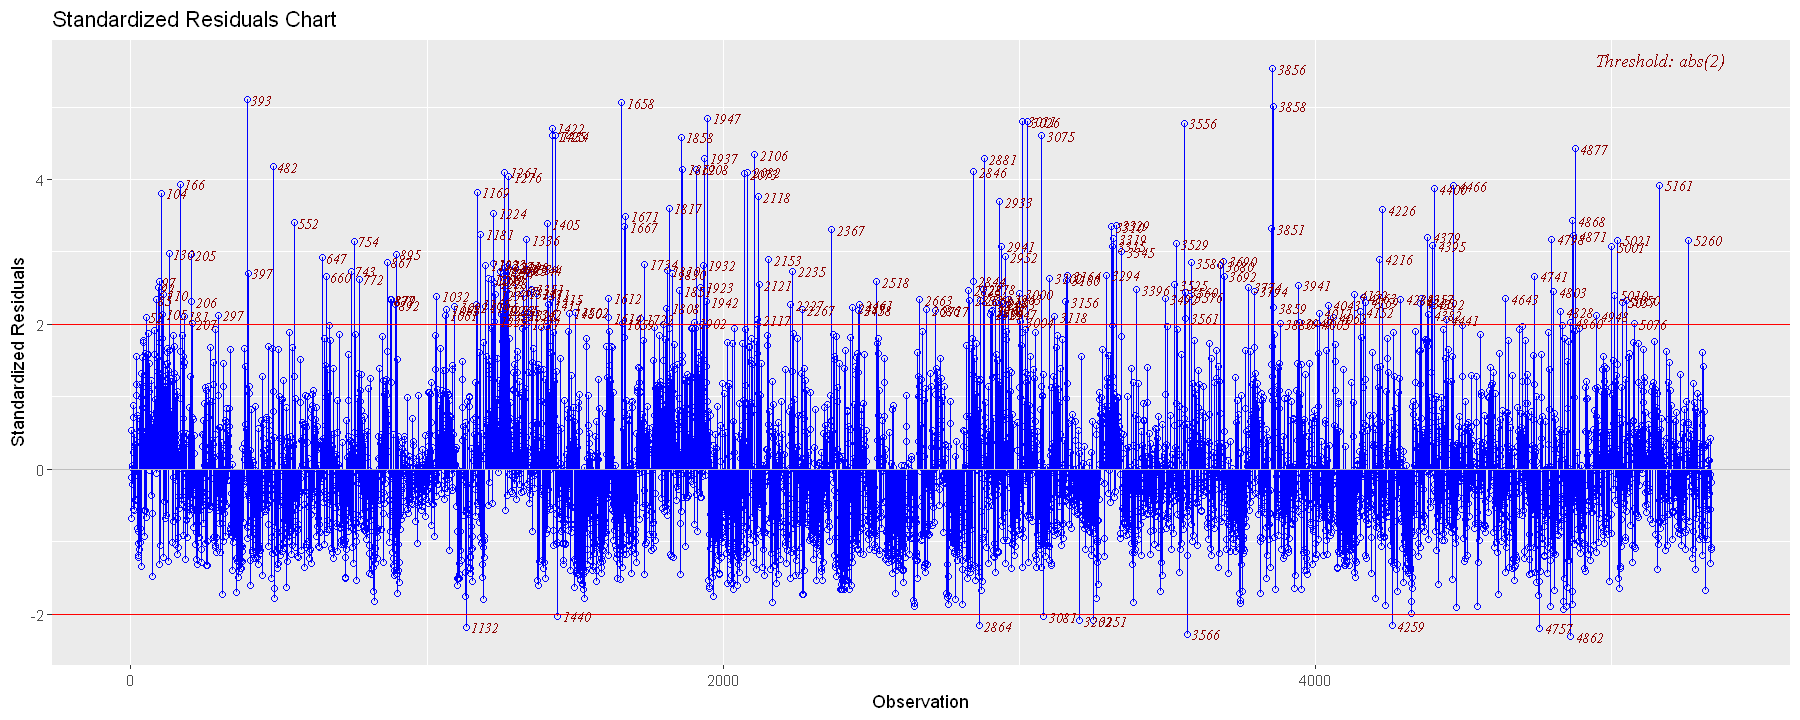

In [189]:
ols_plot_resid_stand(step.model)

##### <span style="color: Teal;"> *3.2.1 Robust Linear Regression Model* </span>

### <span style="color: Salmon;"> *4 Classification Tree* </span>